In [30]:
# load the vector files
import sys
import io
setting = "d2v"

vectorFilesDir = "../Data/vectors/"+setting+"/"+setting+".txt"
allPaperVectors = []

with open(vectorFilesDir, 'r', encoding = 'utf8') as f:
    for line in f:
        read_data = line.split(" ")
        paper_Vectors = read_data
        allPaperVectors.append(paper_Vectors)
f.close()
        
print("Total vector records:",len(allPaperVectors))
print(allPaperVectors[0])

Total vector records: 3149075
['3', '-0.07245799', '-0.15048164', '-0.04320673', '0.01244448', '0.05051953', '-0.05573996', '0.03158288', '-0.04663554', '-0.00442508', '-0.02417533', '-0.03292065', '0.03798062', '0.08195730', '-0.09100581', '-0.04666801', '-0.06315092', '-0.05957321', '0.09766518', '0.01981102', '0.09956500', '-0.02059892', '-0.02321497', '0.10300557', '0.09654117', '0.02085607', '0.15179265', '0.03320639', '0.04716884', '0.04259005', '-0.01022485', '0.07371941', '0.02970656', '0.18967280', '0.07049462', '-0.07849123', '0.10272161', '0.05396378', '0.04138396', '0.08093689', '-0.04713648', '-0.08277001', '0.06004119', '0.15147503', '-0.10719796', '-0.06268646', '0.15823838', '0.10273122', '0.04453533', '-0.00394740', '-0.01239040', '-0.06826647', '-0.02995823', '0.14925463', '0.12254845', '-0.05894163', '0.11628735', '0.03898517', '0.01221054', '-0.00804257', '-0.06178775', '-0.04752085', '-0.04040224', '0.09192738', '0.01171173', '0.02951661', '-0.02156392', '-0.024588

In [31]:
import re
import numpy as np
import os

# collect data
fileDir = "../Data/filteredSameNameAuthor/filter=10/"
fileList = os.listdir(fileDir)
fileList.sort()
print(fileList)

['alfredo martinez.txt', 'alfredo martinez0.txt', 'alfredo martinez1.txt', 'amit patel.txt', 'amit patel0.txt', 'amit patel1.txt', 'ana castro.txt', 'ana castro0.txt', 'ana castro1.txt', 'ana castro2.txt', 'anna ferrari.txt', 'anna ferrari0.txt', 'anna ferrari1.txt', 'bin liu.txt', 'bin liu0.txt', 'bin liu1.txt', 'carmen moreno.txt', 'carmen moreno0.txt', 'carmen moreno1.txt', 'carmen torres.txt', 'carmen torres0.txt', 'carmen torres1.txt', 'chao liu.txt', 'chao liu0.txt', 'chao liu1.txt', 'cheng luo.txt', 'cheng luo0.txt', 'cheng luo1.txt', 'chung-may yang.txt', 'chung-may yang0.txt', 'chung-may yang1.txt', 'david g lloyd.txt', 'david g lloyd0.txt', 'david g lloyd1.txt', 'fang liu.txt', 'fang liu0.txt', 'fang liu1.txt', 'feng liu.txt', 'feng liu0.txt', 'feng liu1.txt', 'feng xu.txt', 'feng xu0.txt', 'feng xu1.txt', 'francisco esteves.txt', 'francisco esteves0.txt', 'francisco esteves1.txt', 'francisco j blanco.txt', 'francisco j blanco0.txt', 'francisco j blanco1.txt', 'giovanni volpe

In [4]:
# remove author(positive sample) from other(negative sample)
import random
def extractNegativeSample(positiveSample, allSample):
    negativeSample = [x for x in allSample if x not in positiveSample]
    print("Total negative sample size:", len(negativeSample))
    return negativeSample

In [8]:
# collect class vectors
import pandas as pd
import numpy as np

def extractVectors(author_pids, NegativeSample_pid, allPaperVectors):
    # extract class one vectors
    author_features = []
    for pid in author_pids:
         for paper_Vectors in allPaperVectors:
            if(paper_Vectors[0] == pid):
                author_features.append(paper_Vectors)
    print("Positive sample size: ", len(author_features))
    classOne = pd.DataFrame(author_features)
    classOne["label"] = 0
    # extract class two vectors
    other_features = []
    for pid in NegativeSample_pid:
        for paper_Vectors in allPaperVectors:
            if(paper_Vectors[0] == pid):
                other_features.append(paper_Vectors)
    print("Negative sample size: ", len(other_features))
    classTwo = pd.DataFrame(other_features)
    classTwo["label"] = 1
    return classOne, classTwo


In [18]:
# combine data from different class get all data
def combineClassesData(classOne,classTwo):
    combinedData = pd.concat([classOne, classTwo])
    combinedData = combinedData.sample(frac=1).reset_index(drop=True)
    # take the paper id out
    paperID = combinedData[0]
    # split data and label
    data = combinedData.drop([0,'label'], axis=1)
    label = combinedData['label']
    print("Total sample size and shape: ",data.shape)
    return data, label, paperID

In [10]:
# Principal Component Analysis (PCA) applied to this data identifies the combination of attributes
# (principal components, or directions in the feature space) that account for the most variance in the data.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
def visualizeWithPCA(plotSavingPath,name, data, label):
    visualize_setting = "PCA"
    pca = PCA(n_components=2)
    pca_transformed = pd.DataFrame(pca.fit_transform(X=data, y=label))
    pca_transformed["label"] = label
    #print(pca_transformed)
    plt.scatter(pca_transformed[label==0][0], pca_transformed[label==0][1], label='Positive sample', c='red')
    plt.scatter(pca_transformed[label==1][0], pca_transformed[label==1][1], label='Other', c='blue')
    plt.legend()
    plt.show()
    plt.savefig((plotSavingPath+name+"_"+visualize_setting+".png").encode('utf-8'))


In [11]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import Normalizer
def visualizeWithTSNE(plotSavingPath,name, data, label):
    visualize_setting = "TSNE"
    tsne_transformed = TSNE(n_components=2, init = "pca").fit_transform(data)
    tsne_transformed_normalized = Normalizer(norm='l2').fit_transform(tsne_transformed)
    tsne_transformed_normalized = pd.DataFrame(tsne_transformed)
    tsne_transformed_normalized["label"] = label
    #print(tsne_transformed_normalized)
    plt.scatter(tsne_transformed_normalized[label==0][0], tsne_transformed_normalized[label==0][1], label='Positive sample', c='red')
    plt.scatter(tsne_transformed_normalized[label==1][0], tsne_transformed_normalized[label==1][1], label='Other', c='blue')
    plt.legend()
    plt.show()
    plt.savefig((plotSavingPath+name+"_"+visualize_setting+".png").encode('utf-8'))

alfredo martinez0
Positive sample size:  17
Total negative sample size: 20
Negative sample size:  20
Positive sample size:  17
Negative sample size:  20
(17, 102)
(20, 102)
Total sample size and shape:  (37, 100)


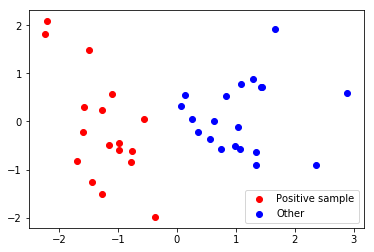

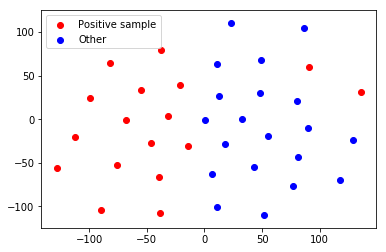

alfredo martinez1
Positive sample size:  20
Total negative sample size: 17
Negative sample size:  17
Positive sample size:  20
Negative sample size:  17
(20, 102)
(17, 102)
Total sample size and shape:  (37, 100)


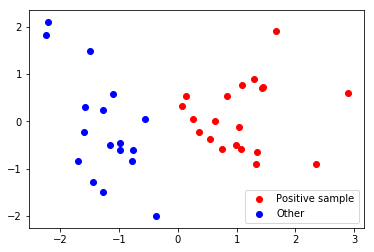

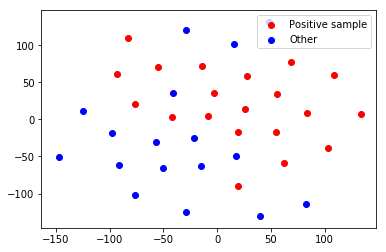

amit patel0
Positive sample size:  11
Total negative sample size: 18
Negative sample size:  18
Positive sample size:  11
Negative sample size:  18
(11, 102)
(18, 102)
Total sample size and shape:  (29, 100)


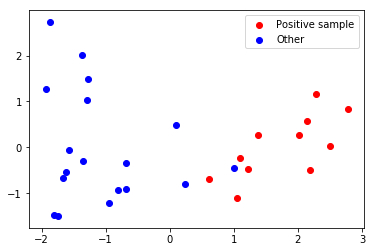

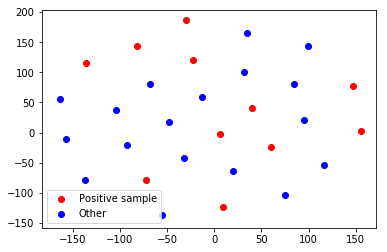

amit patel1
Positive sample size:  18
Total negative sample size: 11
Negative sample size:  11
Positive sample size:  18
Negative sample size:  11
(18, 102)
(11, 102)
Total sample size and shape:  (29, 100)


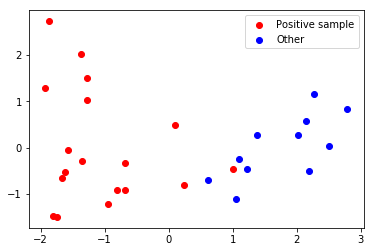

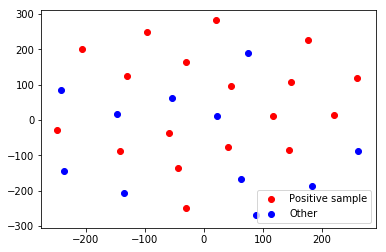

ana castro0
Positive sample size:  11
Total negative sample size: 52
Negative sample size:  52
Positive sample size:  11
Negative sample size:  52
(11, 102)
(52, 102)
Total sample size and shape:  (63, 100)


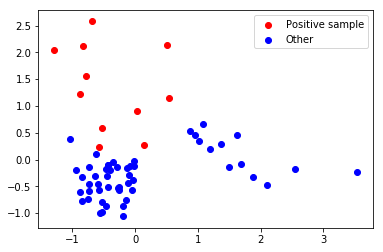

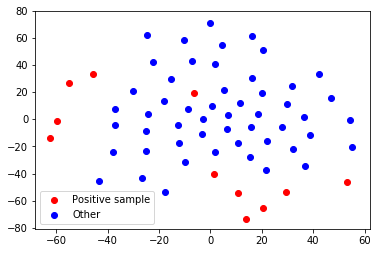

ana castro1
Positive sample size:  13
Total negative sample size: 50
Negative sample size:  50
Positive sample size:  13
Negative sample size:  50
(13, 102)
(50, 102)
Total sample size and shape:  (63, 100)


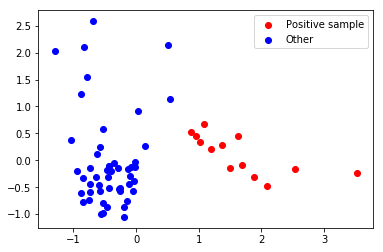

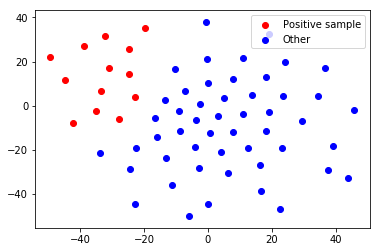

ana castro2
Positive sample size:  39
Total negative sample size: 24
Negative sample size:  24
Positive sample size:  39
Negative sample size:  24
(39, 102)
(24, 102)
Total sample size and shape:  (63, 100)


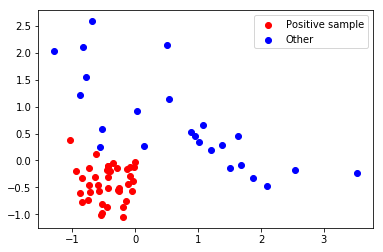

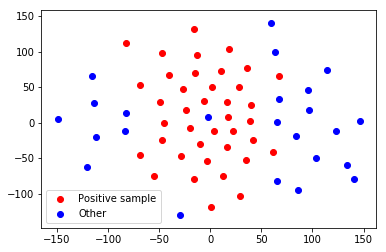

anna ferrari0
Positive sample size:  17
Total negative sample size: 49
Negative sample size:  49
Positive sample size:  17
Negative sample size:  49
(17, 102)
(49, 102)
Total sample size and shape:  (66, 100)


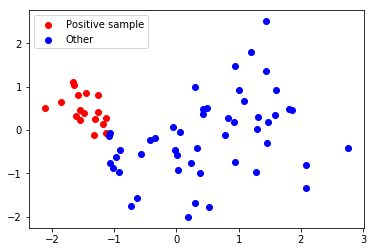

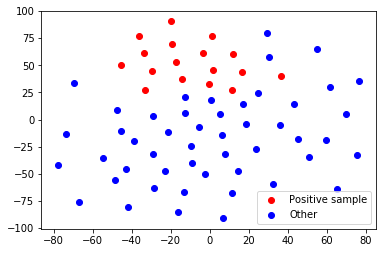

anna ferrari1
Positive sample size:  49
Total negative sample size: 17
Negative sample size:  17
Positive sample size:  49
Negative sample size:  17
(49, 102)
(17, 102)
Total sample size and shape:  (66, 100)


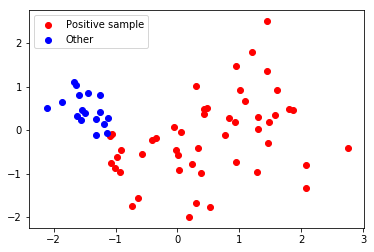

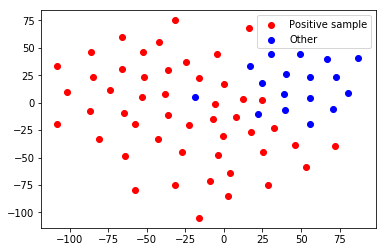

bin liu0
Positive sample size:  14
Total negative sample size: 97
Negative sample size:  97
Positive sample size:  14
Negative sample size:  97
(14, 102)
(97, 102)
Total sample size and shape:  (111, 100)


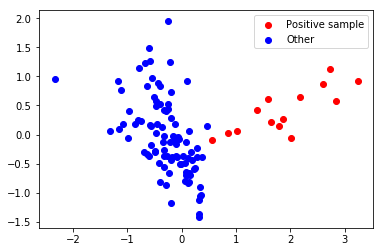

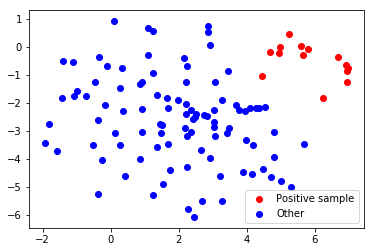

bin liu1
Positive sample size:  97
Total negative sample size: 14
Negative sample size:  14
Positive sample size:  97
Negative sample size:  14
(97, 102)
(14, 102)
Total sample size and shape:  (111, 100)


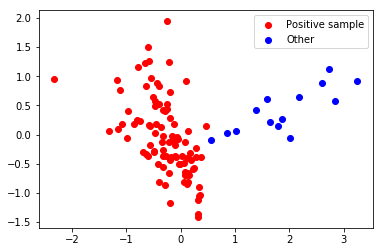

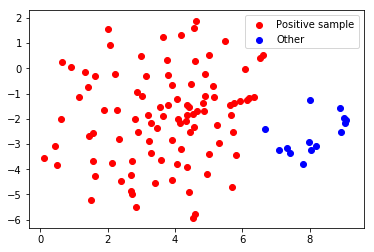

carmen moreno0
Positive sample size:  13
Total negative sample size: 35
Negative sample size:  35
Positive sample size:  13
Negative sample size:  35
(13, 102)
(35, 102)
Total sample size and shape:  (48, 100)


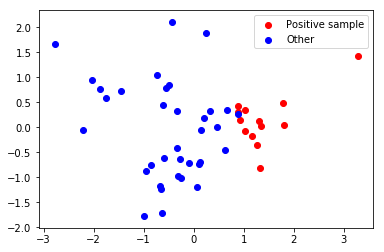

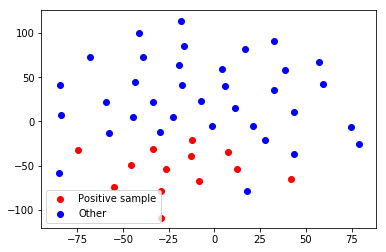

carmen moreno1
Positive sample size:  35
Total negative sample size: 13
Negative sample size:  13
Positive sample size:  35
Negative sample size:  13
(35, 102)
(13, 102)
Total sample size and shape:  (48, 100)


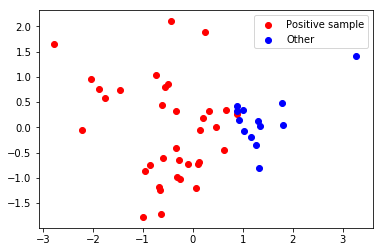

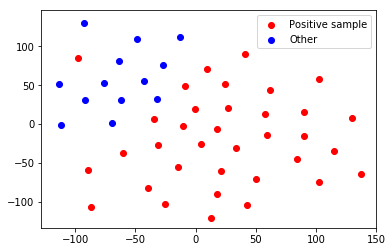

carmen torres0
Positive sample size:  20
Total negative sample size: 237
Negative sample size:  237
Positive sample size:  20
Negative sample size:  237
(20, 102)
(237, 102)
Total sample size and shape:  (257, 100)


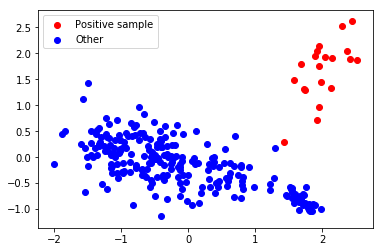

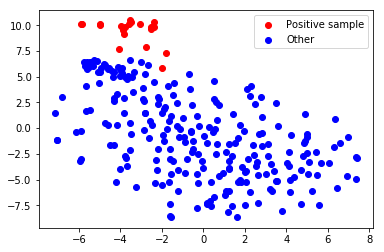

carmen torres1
Positive sample size:  237
Total negative sample size: 20
Negative sample size:  20
Positive sample size:  237
Negative sample size:  20
(237, 102)
(20, 102)
Total sample size and shape:  (257, 100)


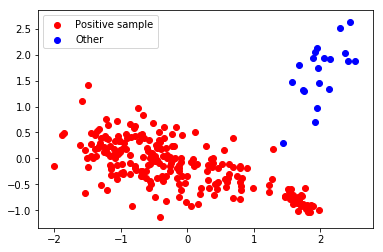

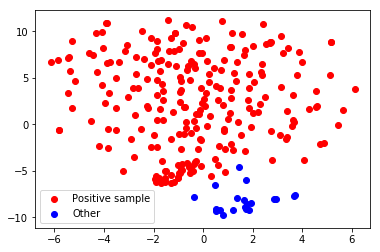

chao liu0
Positive sample size:  16
Total negative sample size: 29
Negative sample size:  29
Positive sample size:  16
Negative sample size:  29
(16, 102)
(29, 102)
Total sample size and shape:  (45, 100)


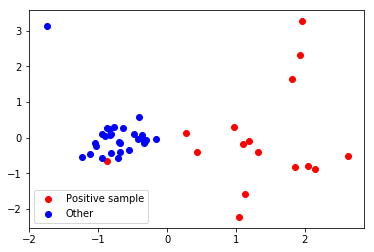

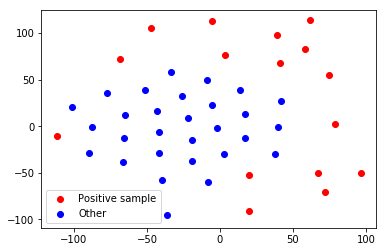

chao liu1
Positive sample size:  29
Total negative sample size: 16
Negative sample size:  16
Positive sample size:  29
Negative sample size:  16
(29, 102)
(16, 102)
Total sample size and shape:  (45, 100)


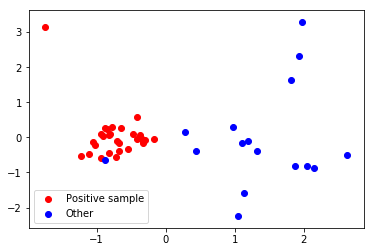

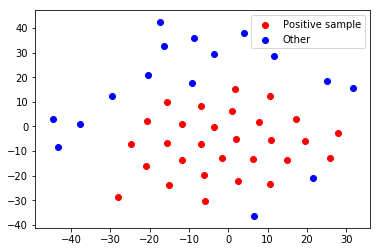

cheng luo0
Positive sample size:  15
Total negative sample size: 36
Negative sample size:  36
Positive sample size:  15
Negative sample size:  36
(15, 102)
(36, 102)
Total sample size and shape:  (51, 100)


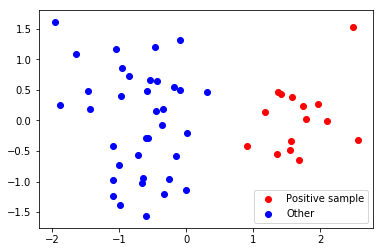

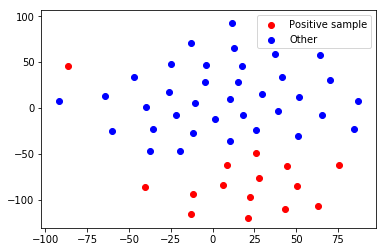

cheng luo1
Positive sample size:  36
Total negative sample size: 15
Negative sample size:  15
Positive sample size:  36
Negative sample size:  15
(36, 102)
(15, 102)
Total sample size and shape:  (51, 100)


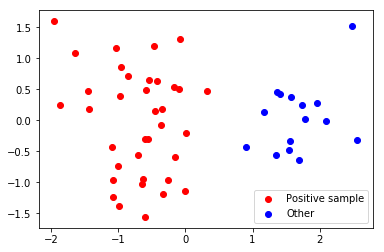

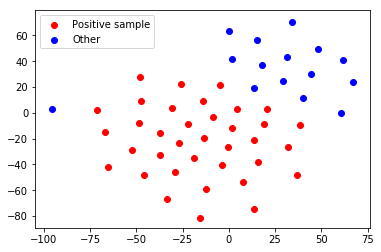

chung-may yang0
Positive sample size:  42
Total negative sample size: 71
Negative sample size:  71
Positive sample size:  42
Negative sample size:  71
(42, 102)
(71, 102)
Total sample size and shape:  (113, 100)


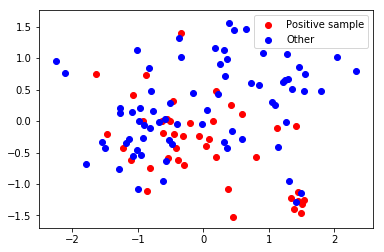

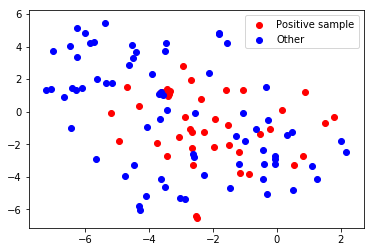

chung-may yang1
Positive sample size:  71
Total negative sample size: 42
Negative sample size:  42
Positive sample size:  71
Negative sample size:  42
(71, 102)
(42, 102)
Total sample size and shape:  (113, 100)


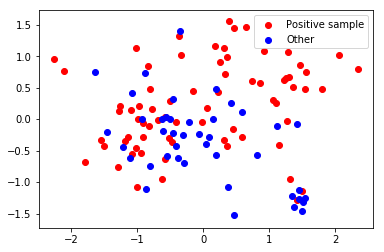

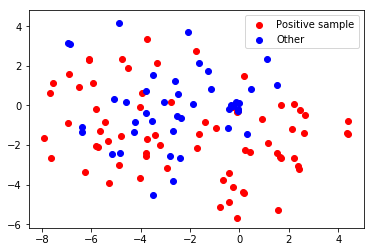

david g lloyd0
Positive sample size:  50
Total negative sample size: 104
Negative sample size:  104
Positive sample size:  50
Negative sample size:  104
(50, 102)
(104, 102)
Total sample size and shape:  (154, 100)


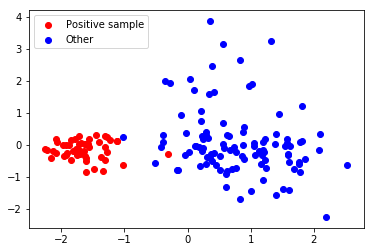

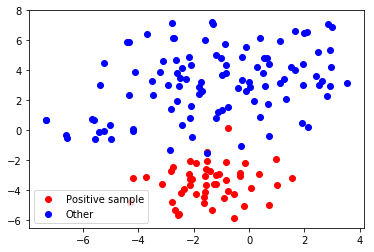

david g lloyd1
Positive sample size:  104
Total negative sample size: 50
Negative sample size:  50
Positive sample size:  104
Negative sample size:  50
(104, 102)
(50, 102)
Total sample size and shape:  (154, 100)


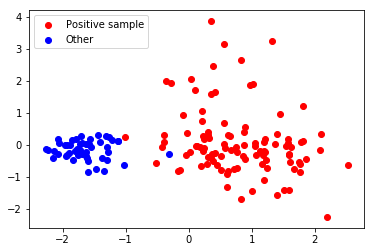

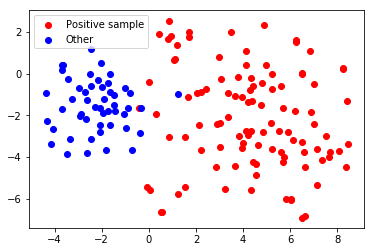

fang liu0
Positive sample size:  11
Total negative sample size: 17
Negative sample size:  17
Positive sample size:  11
Negative sample size:  17
(11, 102)
(17, 102)
Total sample size and shape:  (28, 100)


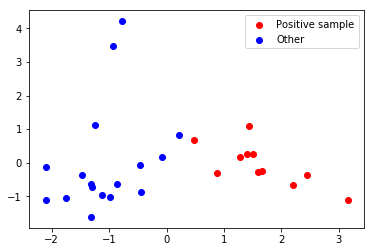

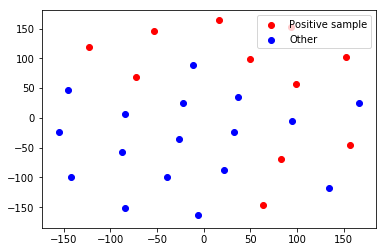

fang liu1
Positive sample size:  17
Total negative sample size: 11
Negative sample size:  11
Positive sample size:  17
Negative sample size:  11
(17, 102)
(11, 102)
Total sample size and shape:  (28, 100)


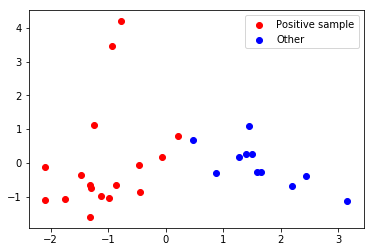

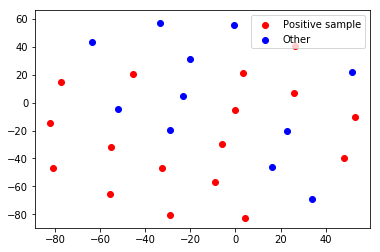

feng liu0
Positive sample size:  30
Total negative sample size: 31
Negative sample size:  31
Positive sample size:  30
Negative sample size:  31
(30, 102)
(31, 102)
Total sample size and shape:  (61, 100)


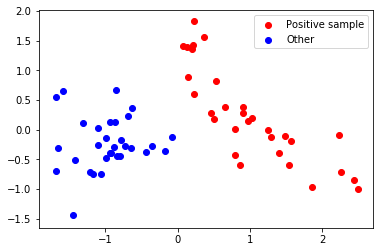

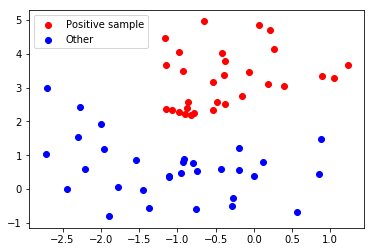

feng liu1
Positive sample size:  31
Total negative sample size: 30
Negative sample size:  30
Positive sample size:  31
Negative sample size:  30
(31, 102)
(30, 102)
Total sample size and shape:  (61, 100)


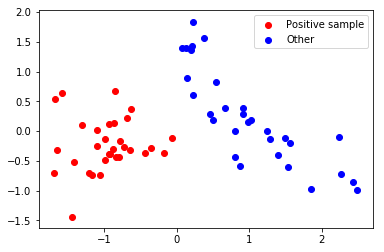

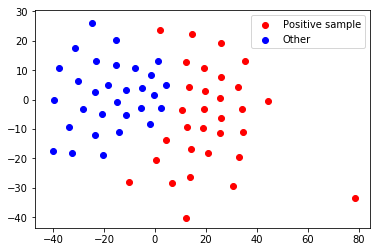

feng xu0
Positive sample size:  12
Total negative sample size: 29
Negative sample size:  29
Positive sample size:  12
Negative sample size:  29
(12, 102)
(29, 102)
Total sample size and shape:  (41, 100)


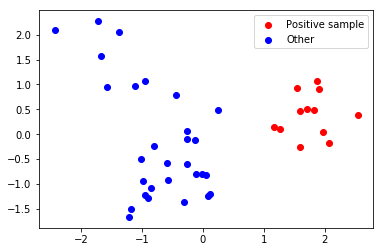

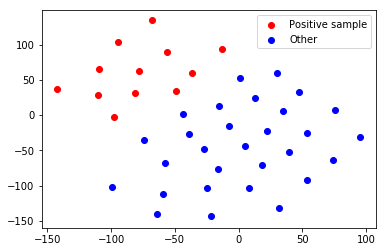

feng xu1
Positive sample size:  29
Total negative sample size: 12
Negative sample size:  12
Positive sample size:  29
Negative sample size:  12
(29, 102)
(12, 102)
Total sample size and shape:  (41, 100)


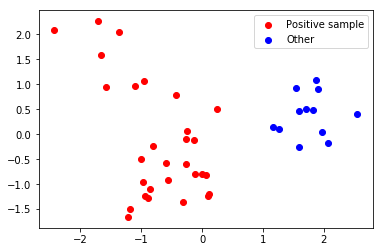

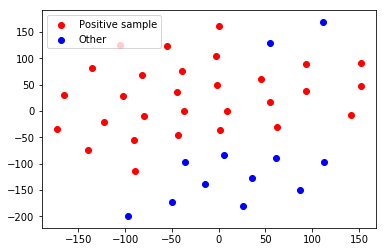

francisco esteves0
Positive sample size:  12
Total negative sample size: 18
Negative sample size:  18
Positive sample size:  12
Negative sample size:  18
(12, 102)
(18, 102)
Total sample size and shape:  (30, 100)


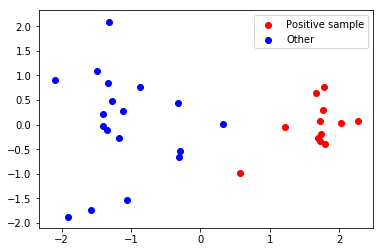

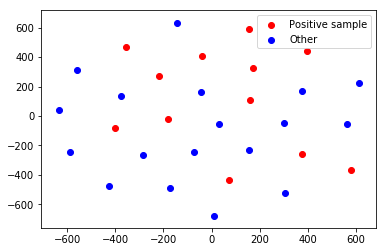

francisco esteves1
Positive sample size:  18
Total negative sample size: 12
Negative sample size:  12
Positive sample size:  18
Negative sample size:  12
(18, 102)
(12, 102)
Total sample size and shape:  (30, 100)


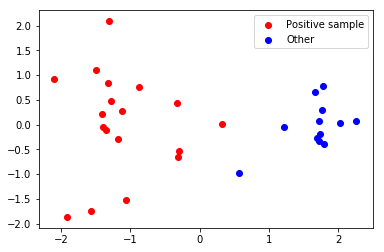

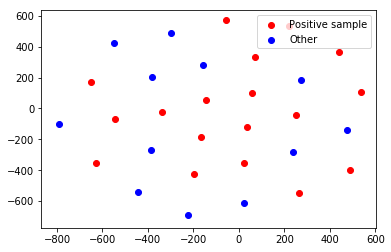

francisco j blanco0
Positive sample size:  16
Total negative sample size: 55
Negative sample size:  55
Positive sample size:  16
Negative sample size:  55
(16, 102)
(55, 102)
Total sample size and shape:  (71, 100)


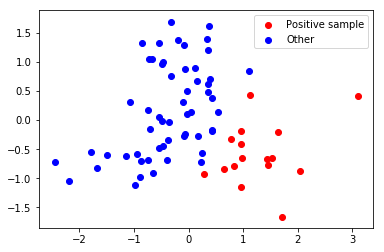

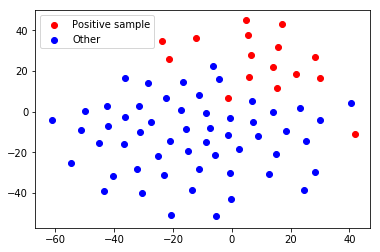

francisco j blanco1
Positive sample size:  55
Total negative sample size: 16
Negative sample size:  16
Positive sample size:  55
Negative sample size:  16
(55, 102)
(16, 102)
Total sample size and shape:  (71, 100)


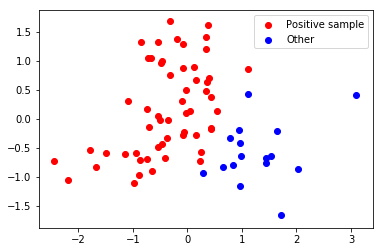

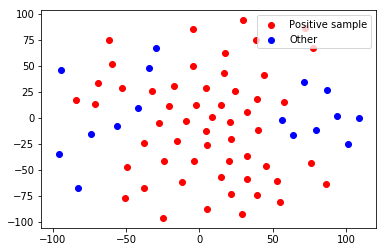

giovanni volpe0
Positive sample size:  14
Total negative sample size: 15
Negative sample size:  15
Positive sample size:  14
Negative sample size:  15
(14, 102)
(15, 102)
Total sample size and shape:  (29, 100)


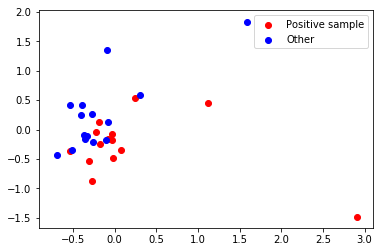

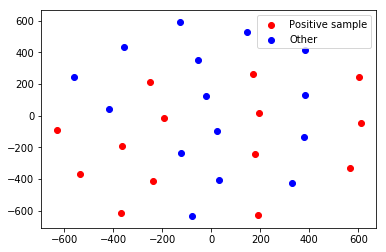

giovanni volpe1
Positive sample size:  15
Total negative sample size: 14
Negative sample size:  14
Positive sample size:  15
Negative sample size:  14
(15, 102)
(14, 102)
Total sample size and shape:  (29, 100)


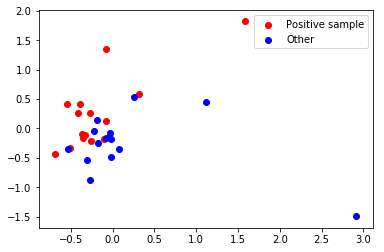

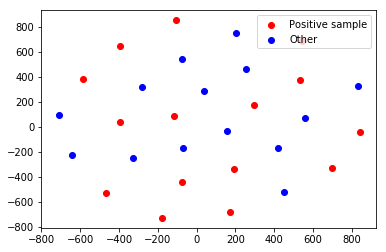

hao song0
Positive sample size:  29
Total negative sample size: 30
Negative sample size:  30
Positive sample size:  29
Negative sample size:  30
(29, 102)
(30, 102)
Total sample size and shape:  (59, 100)


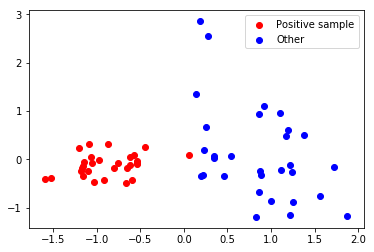

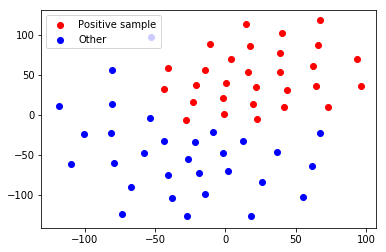

hao song1
Positive sample size:  30
Total negative sample size: 29
Negative sample size:  29
Positive sample size:  30
Negative sample size:  29
(30, 102)
(29, 102)
Total sample size and shape:  (59, 100)


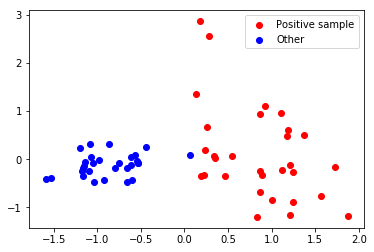

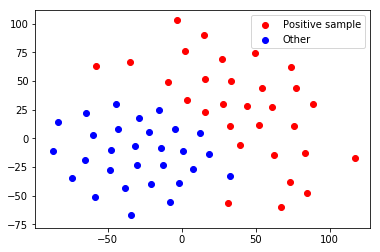

hong yang0
Positive sample size:  18
Total negative sample size: 45
Negative sample size:  45
Positive sample size:  18
Negative sample size:  45
(18, 102)
(45, 102)
Total sample size and shape:  (63, 100)


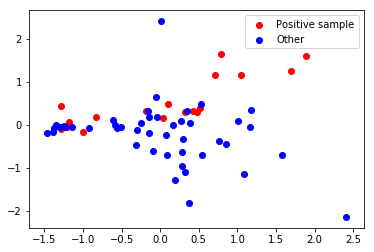

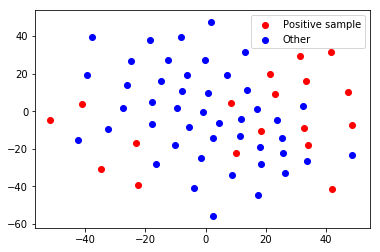

hong yang1
Positive sample size:  45
Total negative sample size: 18
Negative sample size:  18
Positive sample size:  45
Negative sample size:  18
(45, 102)
(18, 102)
Total sample size and shape:  (63, 100)


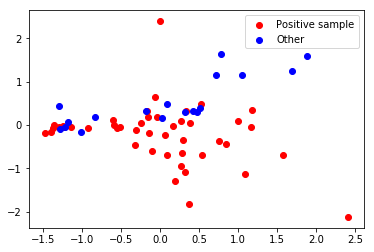

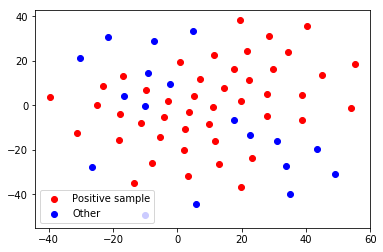

jacob john0
Positive sample size:  11
Total negative sample size: 16
Negative sample size:  16
Positive sample size:  11
Negative sample size:  16
(11, 102)
(16, 102)
Total sample size and shape:  (27, 100)


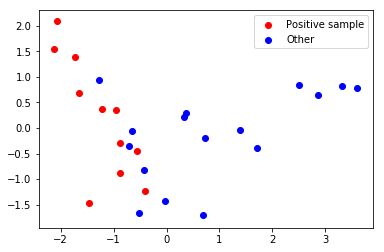

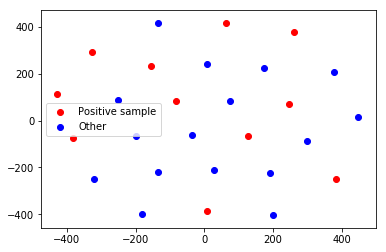

jacob john1
Positive sample size:  16
Total negative sample size: 11
Negative sample size:  11
Positive sample size:  16
Negative sample size:  11
(16, 102)
(11, 102)
Total sample size and shape:  (27, 100)


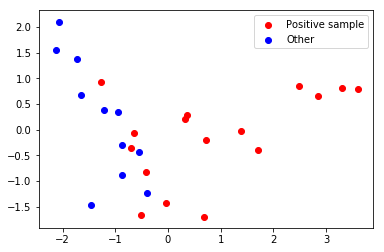

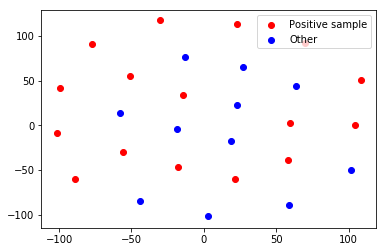

jeong hwan kim0
Positive sample size:  33
Total negative sample size: 51
Negative sample size:  51
Positive sample size:  33
Negative sample size:  51
(33, 102)
(51, 102)
Total sample size and shape:  (84, 100)


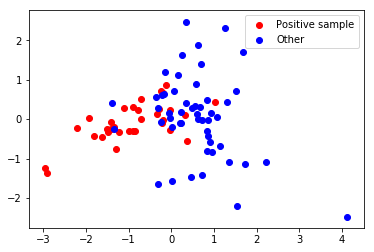

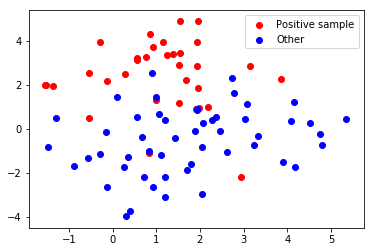

jeong hwan kim1
Positive sample size:  51
Total negative sample size: 33
Negative sample size:  33
Positive sample size:  51
Negative sample size:  33
(51, 102)
(33, 102)
Total sample size and shape:  (84, 100)


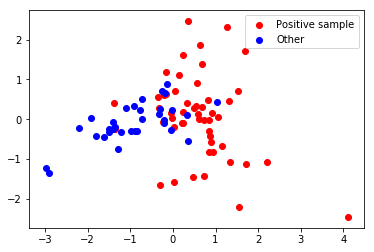

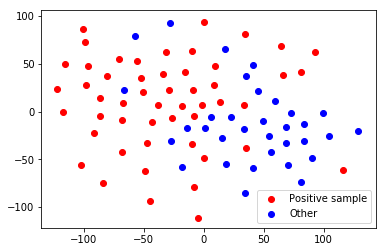

jeremy m brown0
Positive sample size:  14
Total negative sample size: 15
Negative sample size:  15
Positive sample size:  14
Negative sample size:  15
(14, 102)
(15, 102)
Total sample size and shape:  (29, 100)


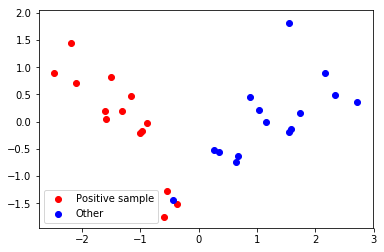

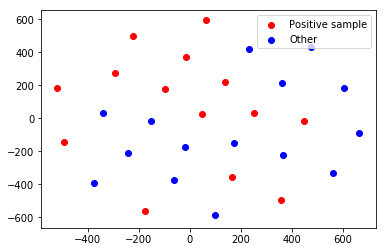

jeremy m brown1
Positive sample size:  15
Total negative sample size: 14
Negative sample size:  14
Positive sample size:  15
Negative sample size:  14
(15, 102)
(14, 102)
Total sample size and shape:  (29, 100)


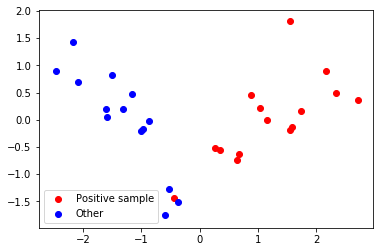

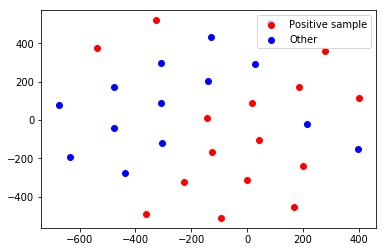

jie zhang0
Positive sample size:  11
Total negative sample size: 58
Negative sample size:  58
Positive sample size:  11
Negative sample size:  58
(11, 102)
(58, 102)
Total sample size and shape:  (69, 100)


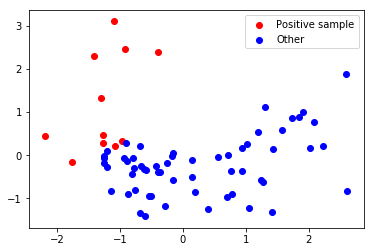

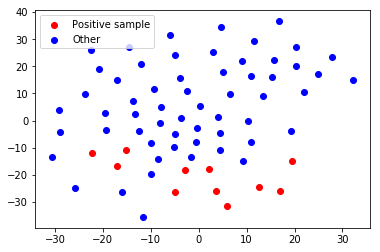

jie zhang1
Positive sample size:  58
Total negative sample size: 11
Negative sample size:  11
Positive sample size:  58
Negative sample size:  11
(58, 102)
(11, 102)
Total sample size and shape:  (69, 100)


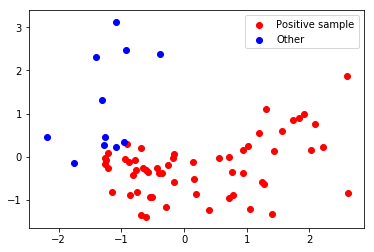

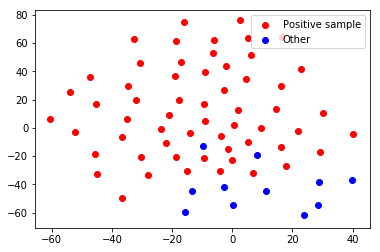

jin young kim0
Positive sample size:  11
Total negative sample size: 41
Negative sample size:  41
Positive sample size:  11
Negative sample size:  41
(11, 102)
(41, 102)
Total sample size and shape:  (52, 100)


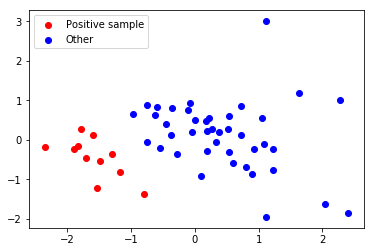

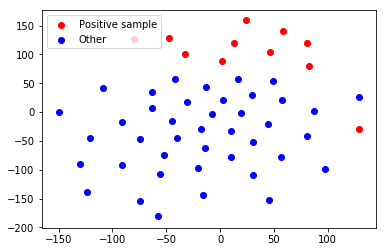

jin young kim1
Positive sample size:  41
Total negative sample size: 11
Negative sample size:  11
Positive sample size:  41
Negative sample size:  11
(41, 102)
(11, 102)
Total sample size and shape:  (52, 100)


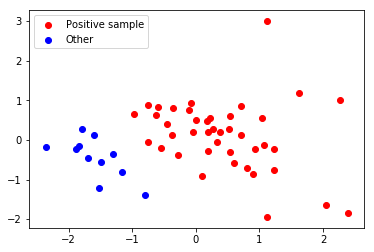

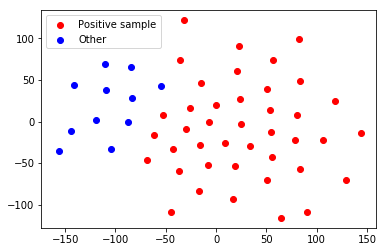

john f marshall0
Positive sample size:  11
Total negative sample size: 16
Negative sample size:  16
Positive sample size:  11
Negative sample size:  16
(11, 102)
(16, 102)
Total sample size and shape:  (27, 100)


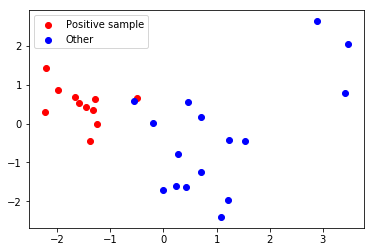

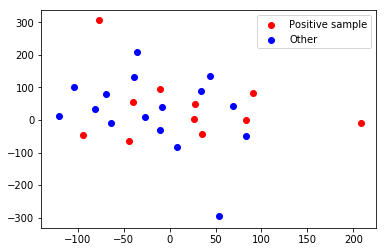

john f marshall1
Positive sample size:  16
Total negative sample size: 11
Negative sample size:  11
Positive sample size:  16
Negative sample size:  11
(16, 102)
(11, 102)
Total sample size and shape:  (27, 100)


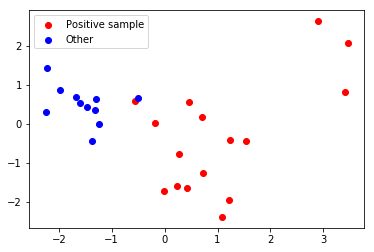

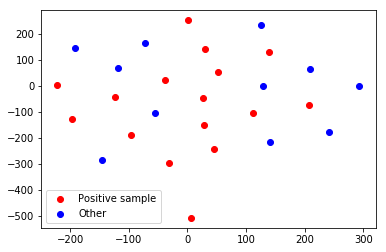

jong hee chang0
Positive sample size:  15
Total negative sample size: 23
Negative sample size:  23
Positive sample size:  15
Negative sample size:  23
(15, 102)
(23, 102)
Total sample size and shape:  (38, 100)


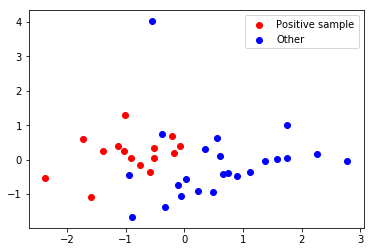

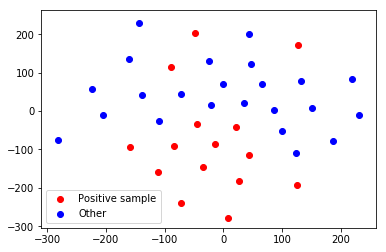

jong hee chang1
Positive sample size:  23
Total negative sample size: 15
Negative sample size:  15
Positive sample size:  23
Negative sample size:  15
(23, 102)
(15, 102)
Total sample size and shape:  (38, 100)


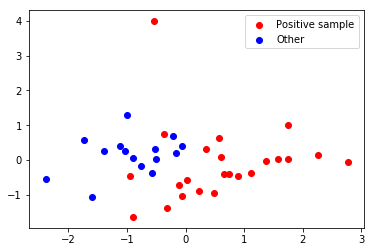

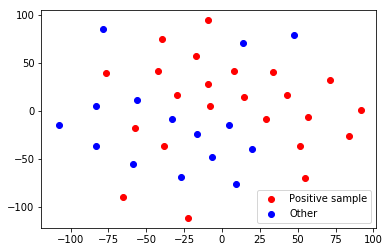

jun chen0
Positive sample size:  11
Total negative sample size: 25
Negative sample size:  25
Positive sample size:  11
Negative sample size:  25
(11, 102)
(25, 102)
Total sample size and shape:  (36, 100)


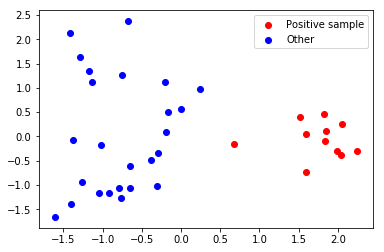

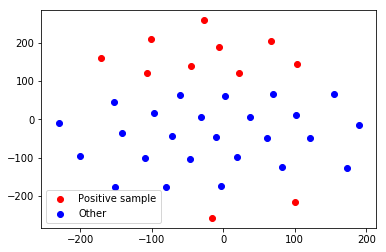

jun chen1
Positive sample size:  12
Total negative sample size: 24
Negative sample size:  24
Positive sample size:  12
Negative sample size:  24
(12, 102)
(24, 102)
Total sample size and shape:  (36, 100)


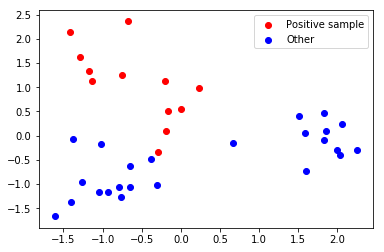

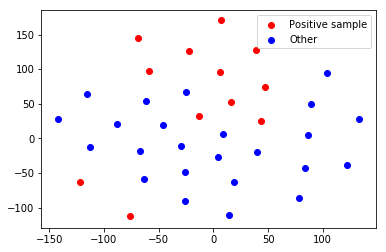

jun chen2
Positive sample size:  13
Total negative sample size: 23
Negative sample size:  23
Positive sample size:  13
Negative sample size:  23
(13, 102)
(23, 102)
Total sample size and shape:  (36, 100)


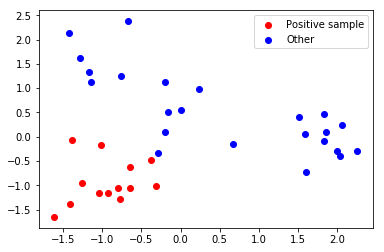

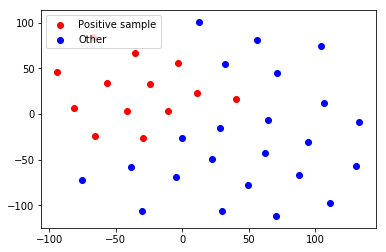

jun zhang0
Positive sample size:  14
Total negative sample size: 24
Negative sample size:  24
Positive sample size:  14
Negative sample size:  24
(14, 102)
(24, 102)
Total sample size and shape:  (38, 100)


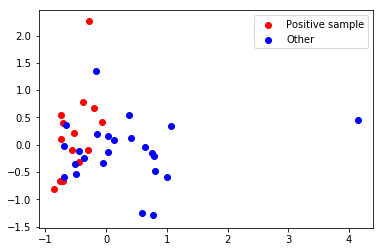

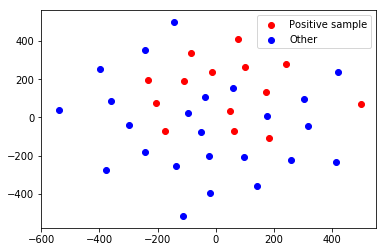

jun zhang1
Positive sample size:  24
Total negative sample size: 14
Negative sample size:  14
Positive sample size:  24
Negative sample size:  14
(24, 102)
(14, 102)
Total sample size and shape:  (38, 100)


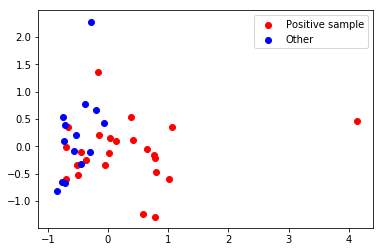

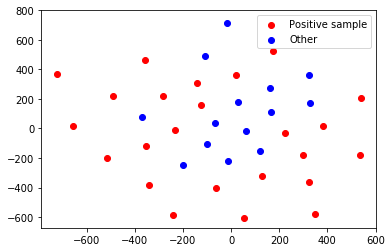

kevin m. ryan0
Positive sample size:  36
Total negative sample size: 79
Negative sample size:  79
Positive sample size:  36
Negative sample size:  79
(36, 102)
(79, 102)
Total sample size and shape:  (115, 100)


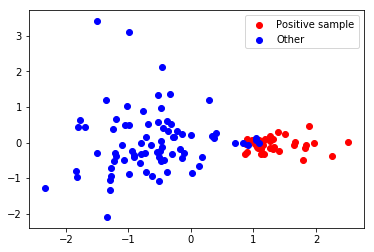

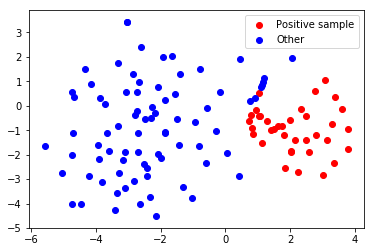

kevin m. ryan1
Positive sample size:  79
Total negative sample size: 36
Negative sample size:  36
Positive sample size:  79
Negative sample size:  36
(79, 102)
(36, 102)
Total sample size and shape:  (115, 100)


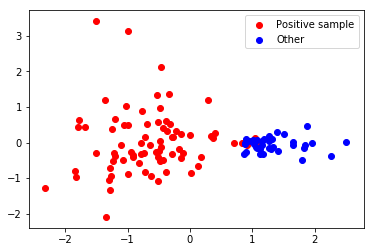

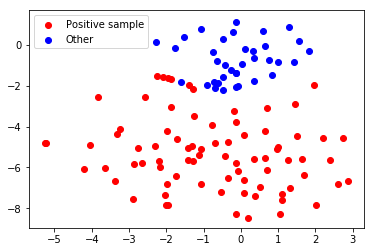

kyung su kim0
Positive sample size:  14
Total negative sample size: 55
Negative sample size:  55
Positive sample size:  14
Negative sample size:  55
(14, 102)
(55, 102)
Total sample size and shape:  (69, 100)


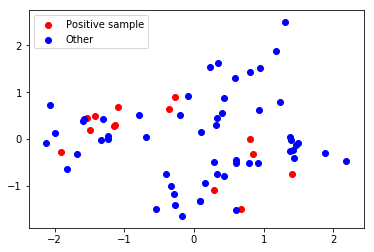

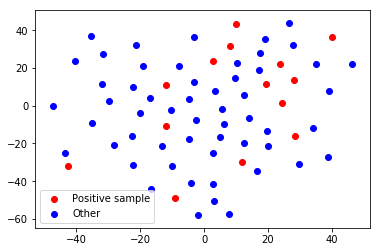

kyung su kim1
Positive sample size:  55
Total negative sample size: 14
Negative sample size:  14
Positive sample size:  55
Negative sample size:  14
(55, 102)
(14, 102)
Total sample size and shape:  (69, 100)


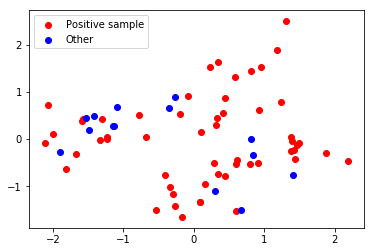

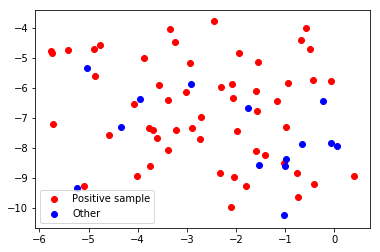

lei wang0
Positive sample size:  16
Total negative sample size: 134
Negative sample size:  134
Positive sample size:  16
Negative sample size:  134
(16, 102)
(134, 102)
Total sample size and shape:  (150, 100)


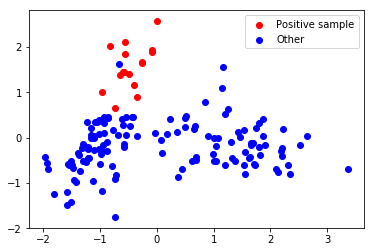

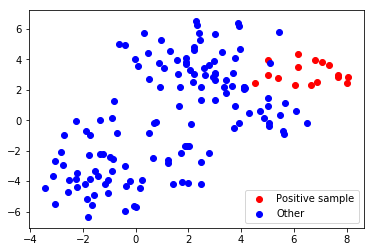

lei wang1
Positive sample size:  17
Total negative sample size: 133
Negative sample size:  133
Positive sample size:  17
Negative sample size:  133
(17, 102)
(133, 102)
Total sample size and shape:  (150, 100)


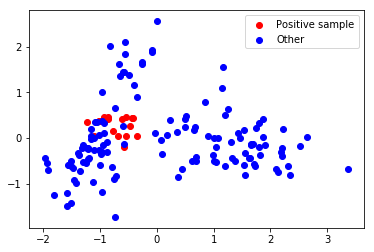

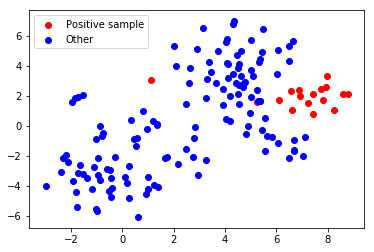

lei wang2
Positive sample size:  53
Total negative sample size: 97
Negative sample size:  97
Positive sample size:  53
Negative sample size:  97
(53, 102)
(97, 102)
Total sample size and shape:  (150, 100)


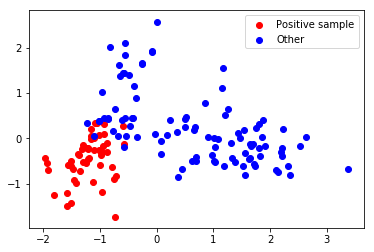

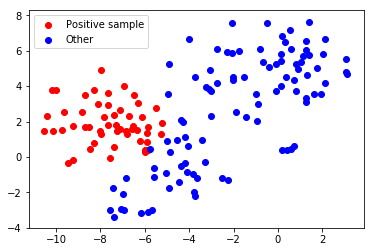

lei wang3
Positive sample size:  64
Total negative sample size: 86
Negative sample size:  86
Positive sample size:  64
Negative sample size:  86
(64, 102)
(86, 102)
Total sample size and shape:  (150, 100)


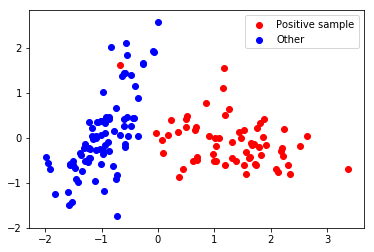

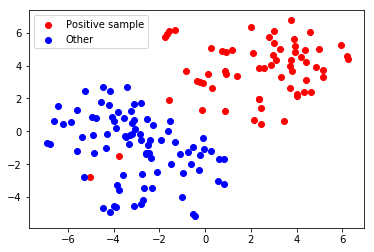

lin yang0
Positive sample size:  11
Total negative sample size: 23
Negative sample size:  23
Positive sample size:  11
Negative sample size:  23
(11, 102)
(23, 102)
Total sample size and shape:  (34, 100)


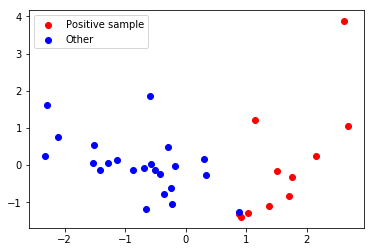

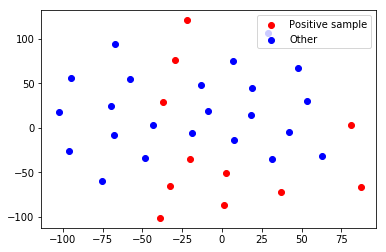

lin yang1
Positive sample size:  23
Total negative sample size: 11
Negative sample size:  11
Positive sample size:  23
Negative sample size:  11
(23, 102)
(11, 102)
Total sample size and shape:  (34, 100)


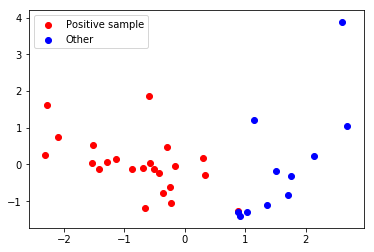

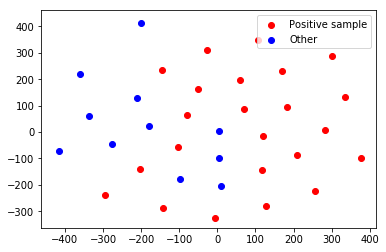

luís alves0
Positive sample size:  11
Total negative sample size: 14
Negative sample size:  14
Positive sample size:  11
Negative sample size:  14
(11, 102)
(14, 102)
Total sample size and shape:  (25, 100)


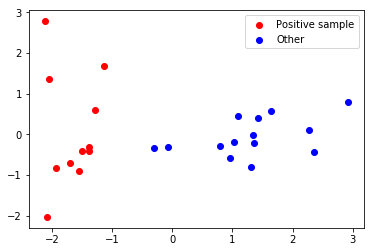

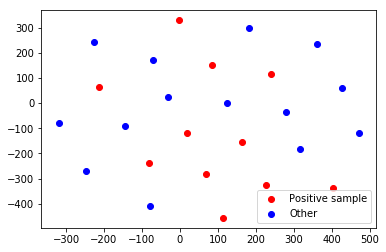

luís alves1
Positive sample size:  14
Total negative sample size: 11
Negative sample size:  11
Positive sample size:  14
Negative sample size:  11
(14, 102)
(11, 102)
Total sample size and shape:  (25, 100)


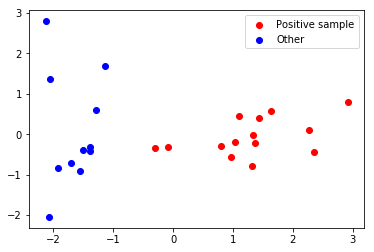

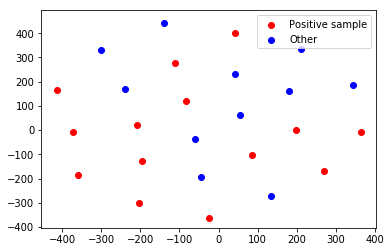

marco ferrari0
Positive sample size:  22
Total negative sample size: 74
Negative sample size:  74
Positive sample size:  22
Negative sample size:  74
(22, 102)
(74, 102)
Total sample size and shape:  (96, 100)


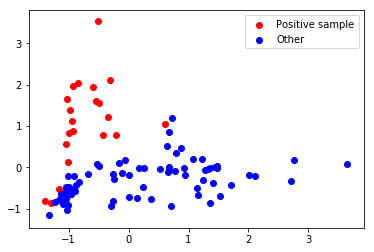

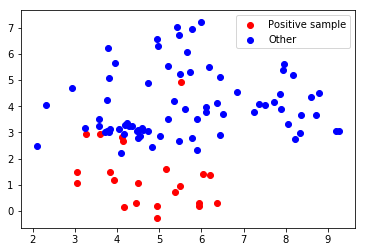

marco ferrari1
Positive sample size:  74
Total negative sample size: 22
Negative sample size:  22
Positive sample size:  74
Negative sample size:  22
(74, 102)
(22, 102)
Total sample size and shape:  (96, 100)


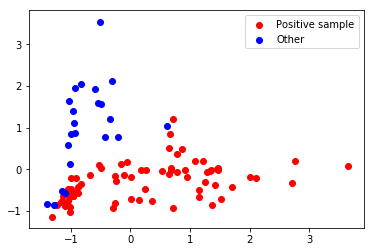

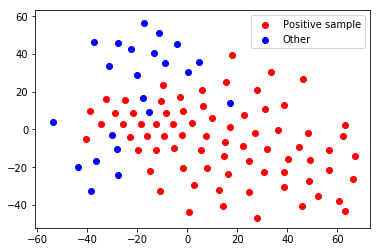

marta crespo0
Positive sample size:  12
Total negative sample size: 20
Negative sample size:  20
Positive sample size:  12
Negative sample size:  20
(12, 102)
(20, 102)
Total sample size and shape:  (32, 100)


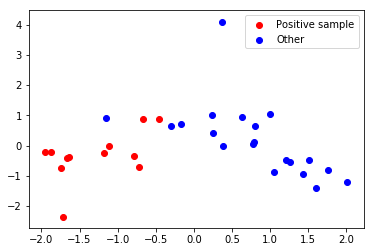

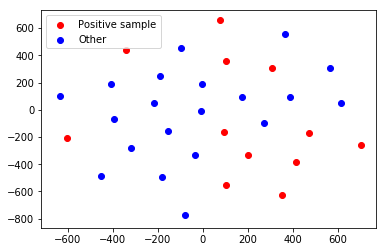

marta crespo1
Positive sample size:  20
Total negative sample size: 12
Negative sample size:  12
Positive sample size:  20
Negative sample size:  12
(20, 102)
(12, 102)
Total sample size and shape:  (32, 100)


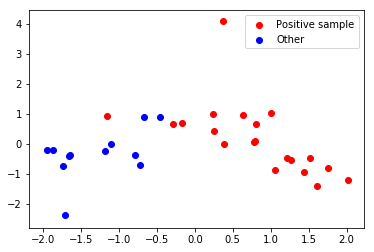

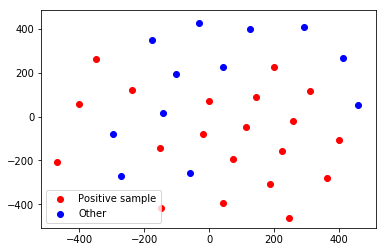

martin wagner0
Positive sample size:  15
Total negative sample size: 15
Negative sample size:  15
Positive sample size:  15
Negative sample size:  15
(15, 102)
(15, 102)
Total sample size and shape:  (30, 100)


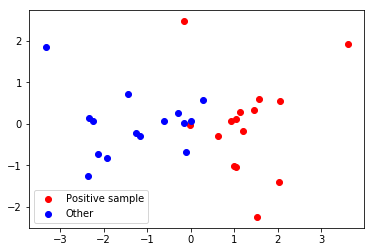

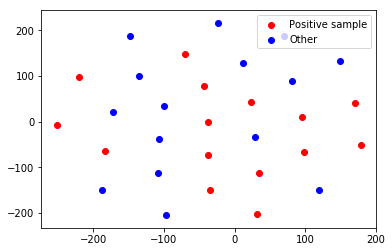

martin wagner1
Positive sample size:  15
Total negative sample size: 15
Negative sample size:  15
Positive sample size:  15
Negative sample size:  15
(15, 102)
(15, 102)
Total sample size and shape:  (30, 100)


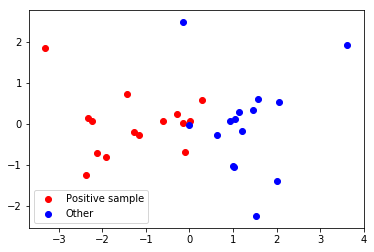

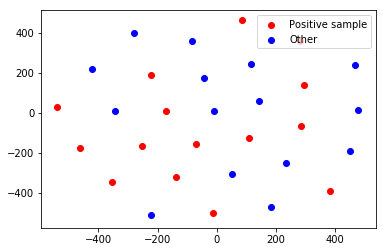

michael wagner0
Positive sample size:  16
Total negative sample size: 239
Negative sample size:  239
Positive sample size:  16
Negative sample size:  239
(16, 102)
(239, 102)
Total sample size and shape:  (255, 100)


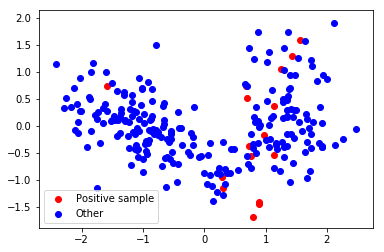

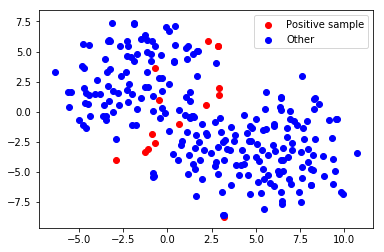

michael wagner1
Positive sample size:  98
Total negative sample size: 157
Negative sample size:  157
Positive sample size:  98
Negative sample size:  157
(98, 102)
(157, 102)
Total sample size and shape:  (255, 100)


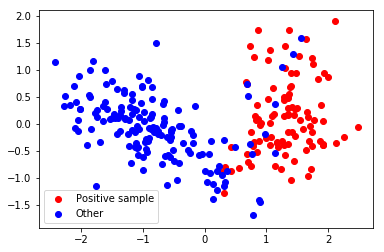

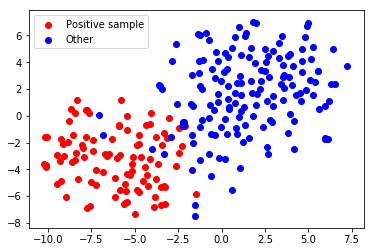

michael wagner2
Positive sample size:  141
Total negative sample size: 114
Negative sample size:  114
Positive sample size:  141
Negative sample size:  114
(141, 102)
(114, 102)
Total sample size and shape:  (255, 100)


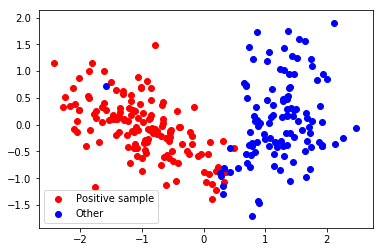

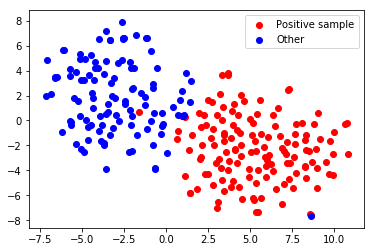

mikael svensson0
Positive sample size:  18
Total negative sample size: 40
Negative sample size:  40
Positive sample size:  18
Negative sample size:  40
(18, 102)
(40, 102)
Total sample size and shape:  (58, 100)


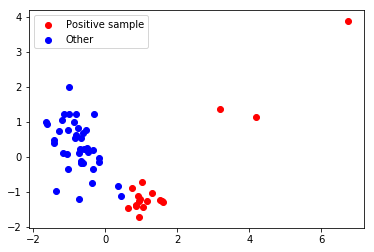

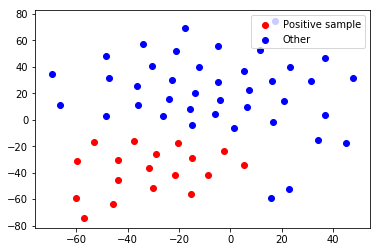

mikael svensson1
Positive sample size:  40
Total negative sample size: 18
Negative sample size:  18
Positive sample size:  40
Negative sample size:  18
(40, 102)
(18, 102)
Total sample size and shape:  (58, 100)


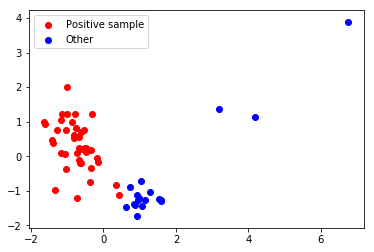

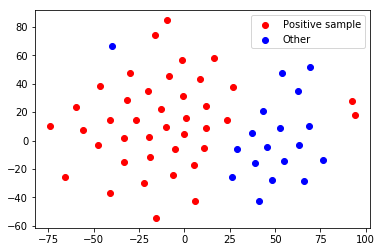

pei-ming yang0
Positive sample size:  17
Total negative sample size: 46
Negative sample size:  46
Positive sample size:  17
Negative sample size:  46
(17, 102)
(46, 102)
Total sample size and shape:  (63, 100)


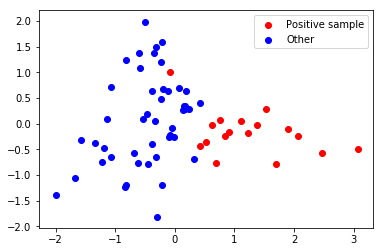

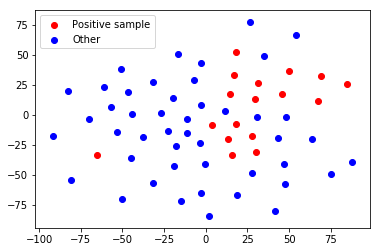

pei-ming yang1
Positive sample size:  46
Total negative sample size: 17
Negative sample size:  17
Positive sample size:  46
Negative sample size:  17
(46, 102)
(17, 102)
Total sample size and shape:  (63, 100)


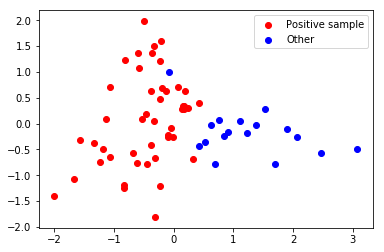

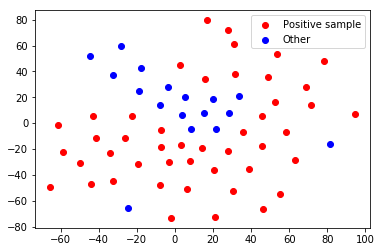

peng zhang0
Positive sample size:  16
Total negative sample size: 62
Negative sample size:  62
Positive sample size:  16
Negative sample size:  62
(16, 102)
(62, 102)
Total sample size and shape:  (78, 100)


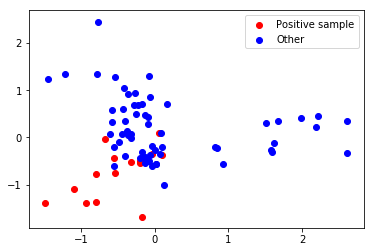

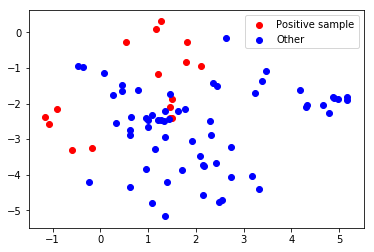

peng zhang1
Positive sample size:  17
Total negative sample size: 61
Negative sample size:  61
Positive sample size:  17
Negative sample size:  61
(17, 102)
(61, 102)
Total sample size and shape:  (78, 100)


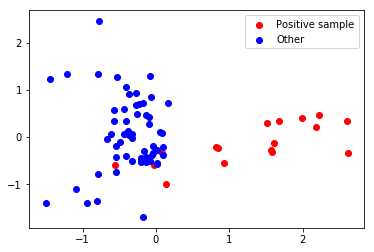

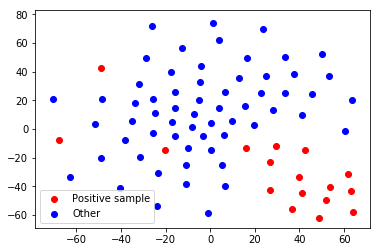

peng zhang2
Positive sample size:  20
Total negative sample size: 58
Negative sample size:  58
Positive sample size:  20
Negative sample size:  58
(20, 102)
(58, 102)
Total sample size and shape:  (78, 100)


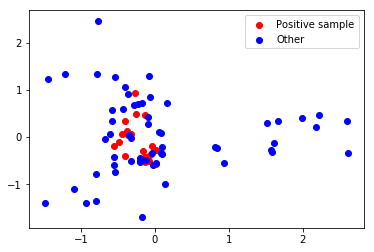

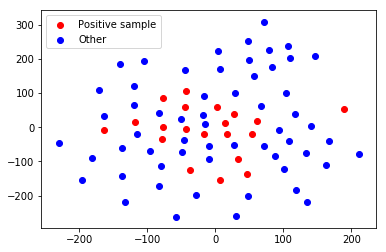

peng zhang3
Positive sample size:  25
Total negative sample size: 53
Negative sample size:  53
Positive sample size:  25
Negative sample size:  53
(25, 102)
(53, 102)
Total sample size and shape:  (78, 100)


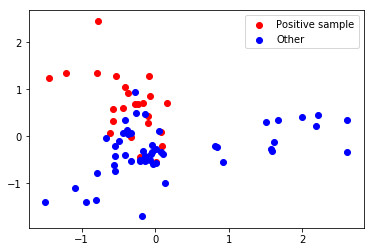

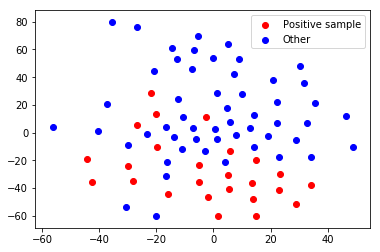

qian wang0
Positive sample size:  12
Total negative sample size: 15
Negative sample size:  15
Positive sample size:  12
Negative sample size:  15
(12, 102)
(15, 102)
Total sample size and shape:  (27, 100)


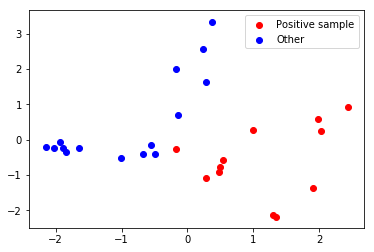

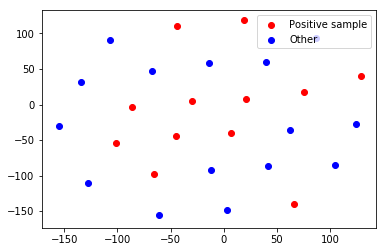

qian wang1
Positive sample size:  15
Total negative sample size: 12
Negative sample size:  12
Positive sample size:  15
Negative sample size:  12
(15, 102)
(12, 102)
Total sample size and shape:  (27, 100)


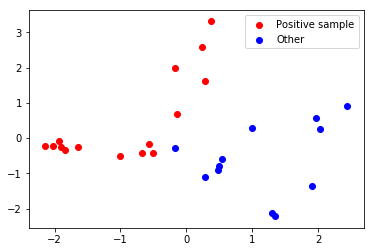

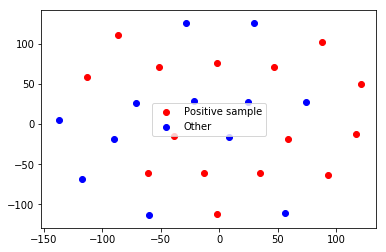

qiang wang0
Positive sample size:  12
Total negative sample size: 31
Negative sample size:  31
Positive sample size:  12
Negative sample size:  31
(12, 102)
(31, 102)
Total sample size and shape:  (43, 100)


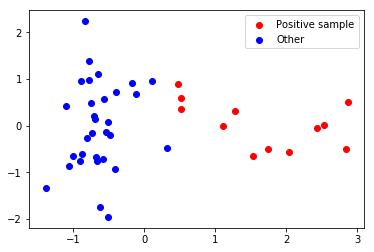

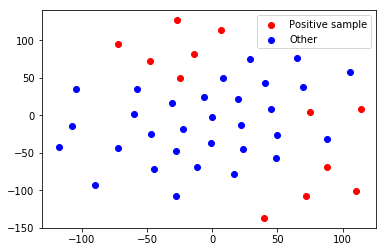

qiang wang1
Positive sample size:  31
Total negative sample size: 12
Negative sample size:  12
Positive sample size:  31
Negative sample size:  12
(31, 102)
(12, 102)
Total sample size and shape:  (43, 100)


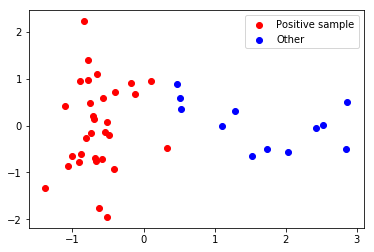

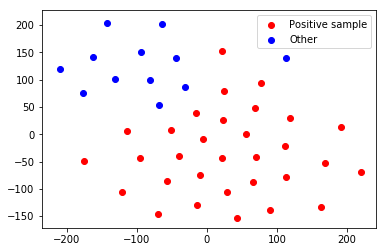

qin li0
Positive sample size:  14
Total negative sample size: 20
Negative sample size:  20
Positive sample size:  14
Negative sample size:  20
(14, 102)
(20, 102)
Total sample size and shape:  (34, 100)


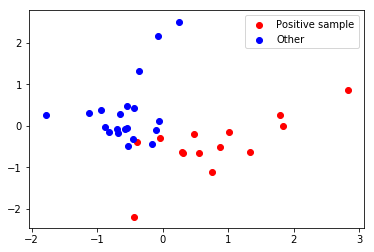

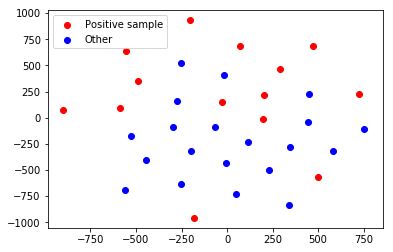

qin li1
Positive sample size:  20
Total negative sample size: 14
Negative sample size:  14
Positive sample size:  20
Negative sample size:  14
(20, 102)
(14, 102)
Total sample size and shape:  (34, 100)


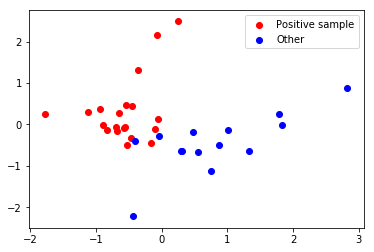

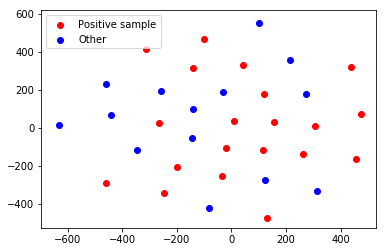

richard w morris0
Positive sample size:  21
Total negative sample size: 107
Negative sample size:  107
Positive sample size:  21
Negative sample size:  107
(21, 102)
(107, 102)
Total sample size and shape:  (128, 100)


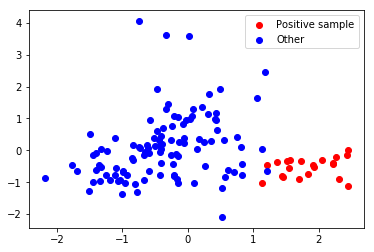

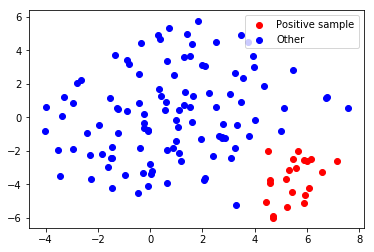

richard w morris1
Positive sample size:  107
Total negative sample size: 21
Negative sample size:  21
Positive sample size:  107
Negative sample size:  21
(107, 102)
(21, 102)
Total sample size and shape:  (128, 100)


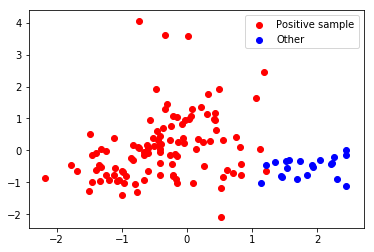

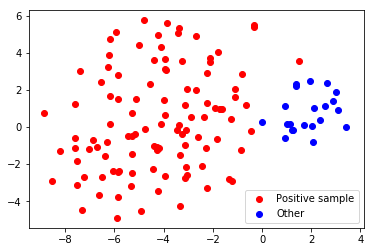

robert j young0
Positive sample size:  24
Total negative sample size: 38
Negative sample size:  38
Positive sample size:  24
Negative sample size:  38
(24, 102)
(38, 102)
Total sample size and shape:  (62, 100)


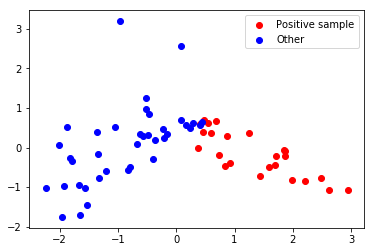

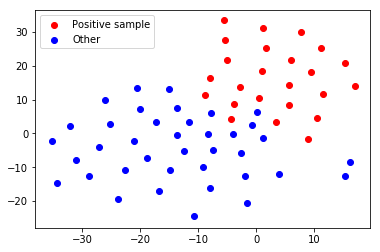

robert j young1
Positive sample size:  38
Total negative sample size: 24
Negative sample size:  24
Positive sample size:  38
Negative sample size:  24
(38, 102)
(24, 102)
Total sample size and shape:  (62, 100)


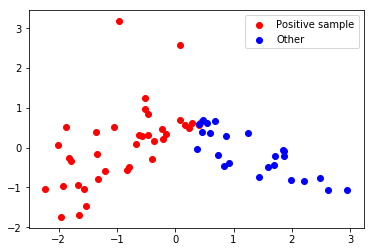

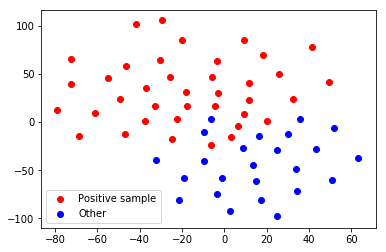

sebastian wolf0
Positive sample size:  15
Total negative sample size: 102
Negative sample size:  102
Positive sample size:  15
Negative sample size:  102
(15, 102)
(102, 102)
Total sample size and shape:  (117, 100)


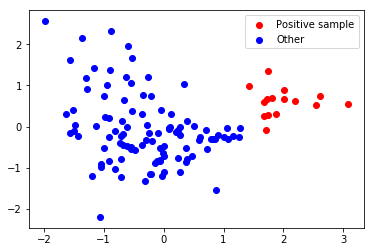

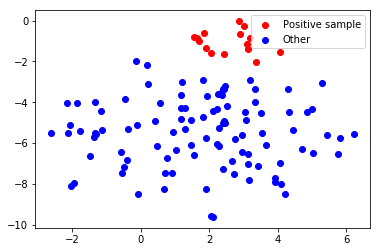

sebastian wolf1
Positive sample size:  102
Total negative sample size: 15
Negative sample size:  15
Positive sample size:  102
Negative sample size:  15
(102, 102)
(15, 102)
Total sample size and shape:  (117, 100)


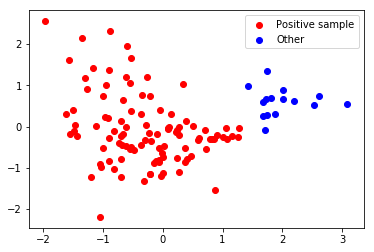

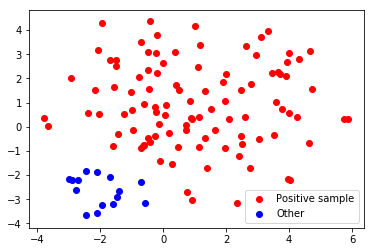

vineet gupta0
Positive sample size:  14
Total negative sample size: 22
Negative sample size:  22
Positive sample size:  14
Negative sample size:  22
(14, 102)
(22, 102)
Total sample size and shape:  (36, 100)


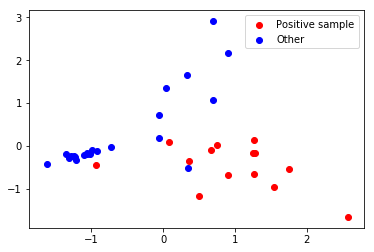

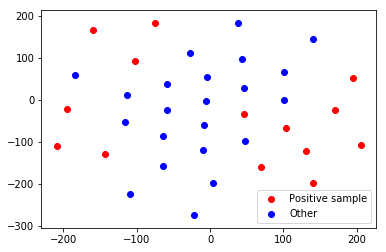

vineet gupta1
Positive sample size:  22
Total negative sample size: 14
Negative sample size:  14
Positive sample size:  22
Negative sample size:  14
(22, 102)
(14, 102)
Total sample size and shape:  (36, 100)


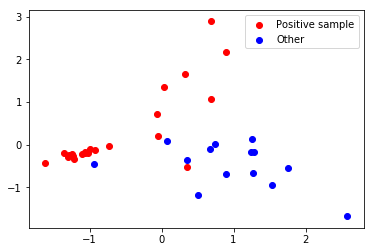

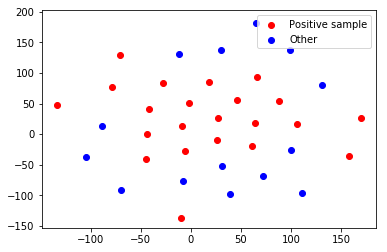

vivek gupta0
Positive sample size:  14
Total negative sample size: 26
Negative sample size:  26
Positive sample size:  14
Negative sample size:  26
(14, 102)
(26, 102)
Total sample size and shape:  (40, 100)


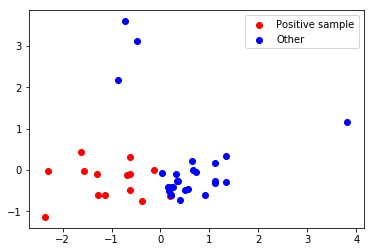

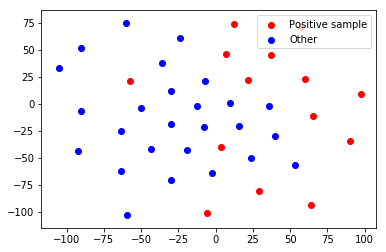

vivek gupta1
Positive sample size:  26
Total negative sample size: 14
Negative sample size:  14
Positive sample size:  26
Negative sample size:  14
(26, 102)
(14, 102)
Total sample size and shape:  (40, 100)


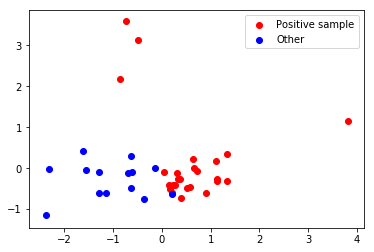

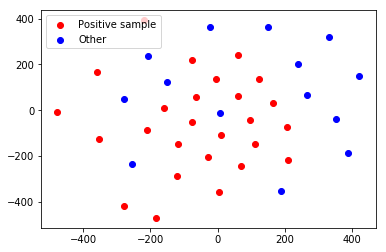

vivek kumar0
Positive sample size:  15
Total negative sample size: 18
Negative sample size:  18
Positive sample size:  15
Negative sample size:  18
(15, 102)
(18, 102)
Total sample size and shape:  (33, 100)


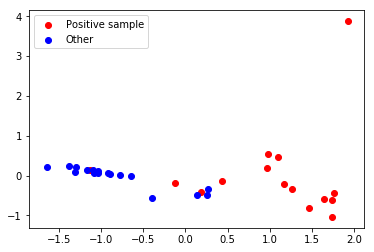

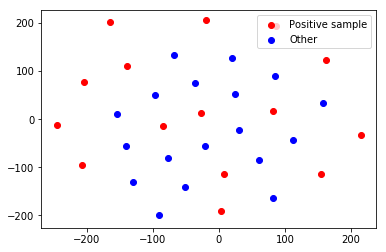

vivek kumar1
Positive sample size:  18
Total negative sample size: 15
Negative sample size:  15
Positive sample size:  18
Negative sample size:  15
(18, 102)
(15, 102)
Total sample size and shape:  (33, 100)


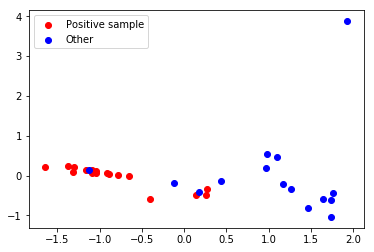

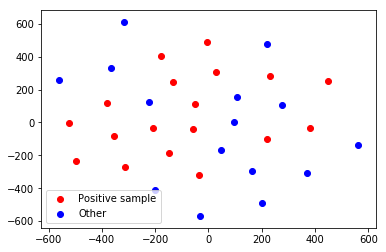

wei lu0
Positive sample size:  30
Total negative sample size: 33
Negative sample size:  33
Positive sample size:  30
Negative sample size:  33
(30, 102)
(33, 102)
Total sample size and shape:  (63, 100)


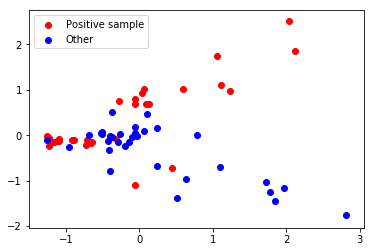

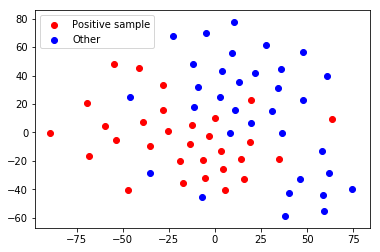

wei lu1
Positive sample size:  33
Total negative sample size: 30
Negative sample size:  30
Positive sample size:  33
Negative sample size:  30
(33, 102)
(30, 102)
Total sample size and shape:  (63, 100)


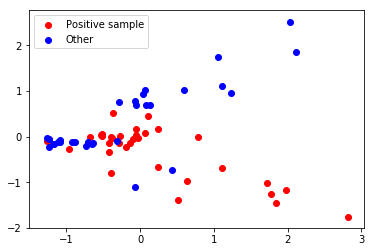

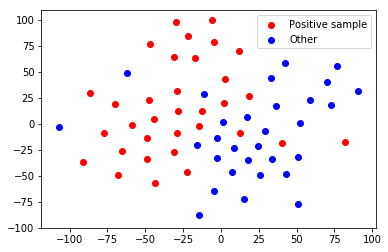

wei wang0
Positive sample size:  12
Total negative sample size: 142
Negative sample size:  142
Positive sample size:  12
Negative sample size:  142
(12, 102)
(142, 102)
Total sample size and shape:  (154, 100)


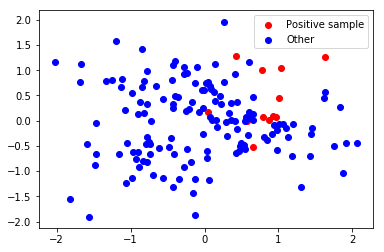

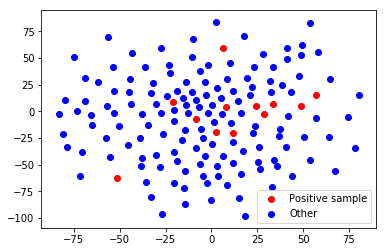

wei wang1
Positive sample size:  13
Total negative sample size: 141
Negative sample size:  141
Positive sample size:  13
Negative sample size:  141
(13, 102)
(141, 102)
Total sample size and shape:  (154, 100)


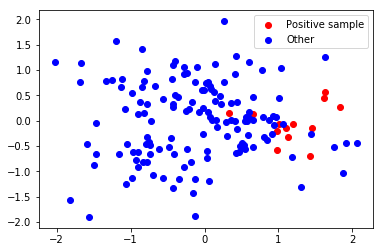

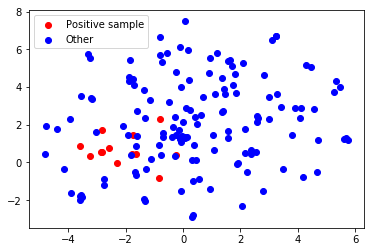

wei wang2
Positive sample size:  14
Total negative sample size: 140
Negative sample size:  140
Positive sample size:  14
Negative sample size:  140
(14, 102)
(140, 102)
Total sample size and shape:  (154, 100)


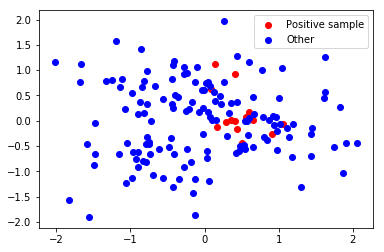

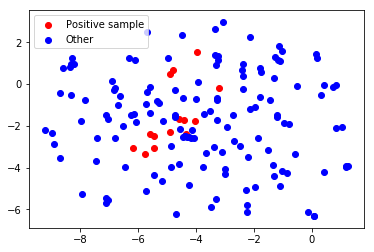

wei wang3
Positive sample size:  14
Total negative sample size: 140
Negative sample size:  140
Positive sample size:  14
Negative sample size:  140
(14, 102)
(140, 102)
Total sample size and shape:  (154, 100)


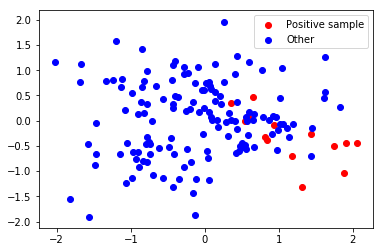

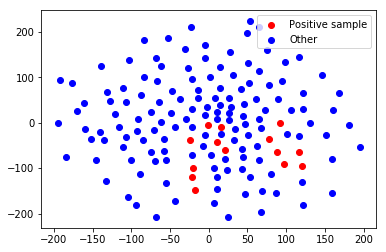

wei wang4
Positive sample size:  101
Total negative sample size: 53
Negative sample size:  53
Positive sample size:  101
Negative sample size:  53
(101, 102)
(53, 102)
Total sample size and shape:  (154, 100)


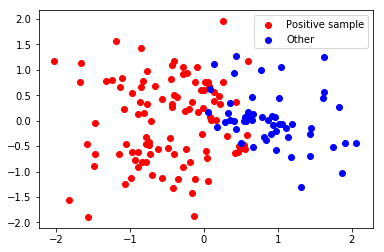

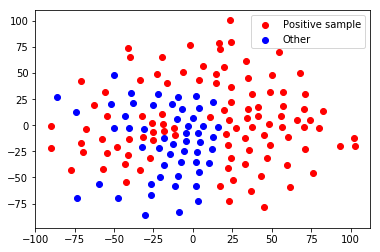

wei xu0
Positive sample size:  16
Total negative sample size: 19
Negative sample size:  19
Positive sample size:  16
Negative sample size:  19
(16, 102)
(19, 102)
Total sample size and shape:  (35, 100)


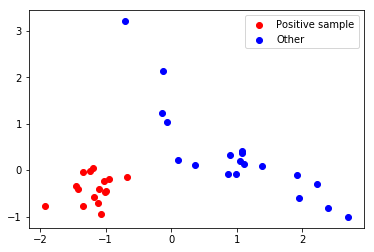

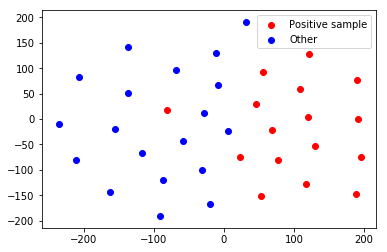

wei xu1
Positive sample size:  19
Total negative sample size: 16
Negative sample size:  16
Positive sample size:  19
Negative sample size:  16
(19, 102)
(16, 102)
Total sample size and shape:  (35, 100)


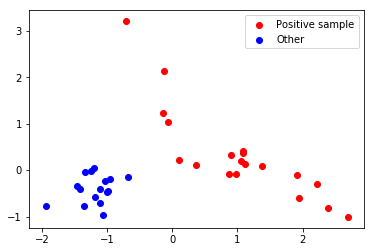

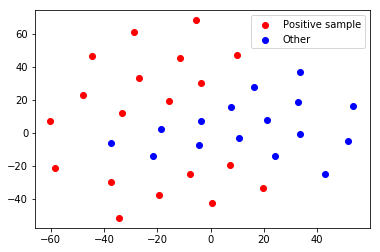

xin li0
Positive sample size:  11
Total negative sample size: 51
Negative sample size:  51
Positive sample size:  11
Negative sample size:  51
(11, 102)
(51, 102)
Total sample size and shape:  (62, 100)


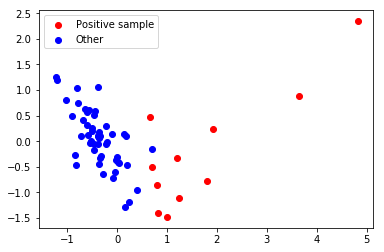

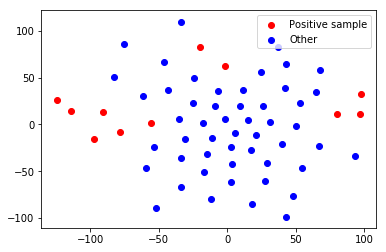

xin li1
Positive sample size:  51
Total negative sample size: 11
Negative sample size:  11
Positive sample size:  51
Negative sample size:  11
(51, 102)
(11, 102)
Total sample size and shape:  (62, 100)


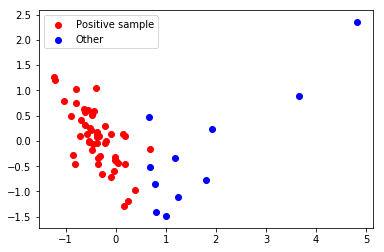

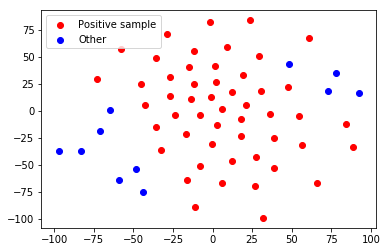

yang wang0
Positive sample size:  11
Total negative sample size: 24
Negative sample size:  24
Positive sample size:  11
Negative sample size:  24
(11, 102)
(24, 102)
Total sample size and shape:  (35, 100)


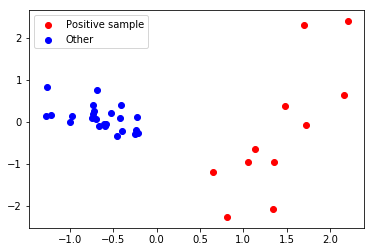

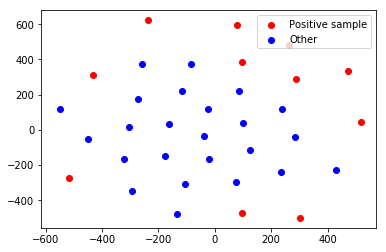

yang wang1
Positive sample size:  24
Total negative sample size: 11
Negative sample size:  11
Positive sample size:  24
Negative sample size:  11
(24, 102)
(11, 102)
Total sample size and shape:  (35, 100)


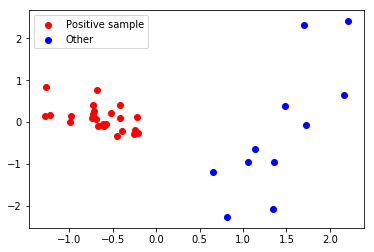

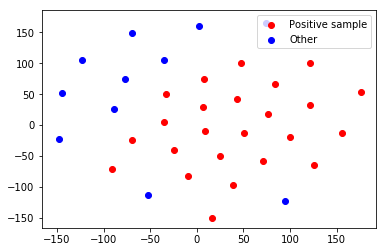

yang zhao0
Positive sample size:  16
Total negative sample size: 47
Negative sample size:  47
Positive sample size:  16
Negative sample size:  47
(16, 102)
(47, 102)
Total sample size and shape:  (63, 100)


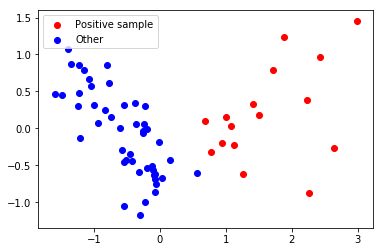

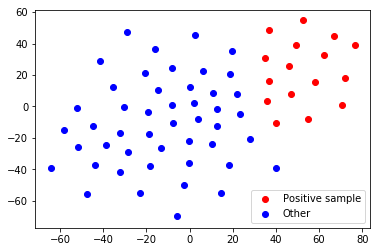

yang zhao1
Positive sample size:  47
Total negative sample size: 16
Negative sample size:  16
Positive sample size:  47
Negative sample size:  16
(47, 102)
(16, 102)
Total sample size and shape:  (63, 100)


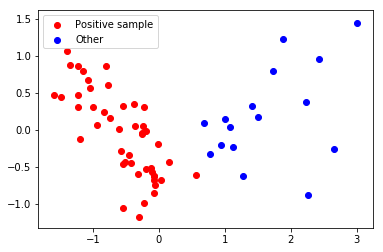

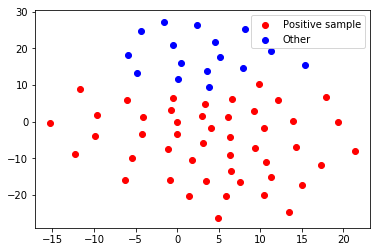

ying liu0
Positive sample size:  12
Total negative sample size: 41
Negative sample size:  41
Positive sample size:  12
Negative sample size:  41
(12, 102)
(41, 102)
Total sample size and shape:  (53, 100)


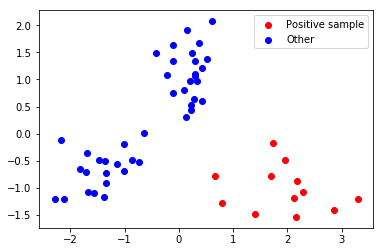

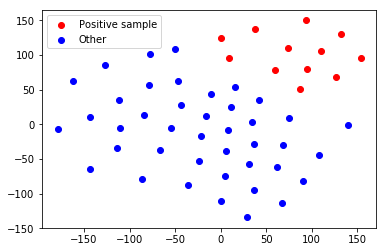

ying liu1
Positive sample size:  19
Total negative sample size: 34
Negative sample size:  34
Positive sample size:  19
Negative sample size:  34
(19, 102)
(34, 102)
Total sample size and shape:  (53, 100)


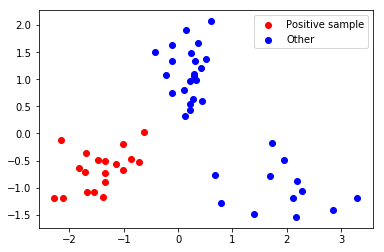

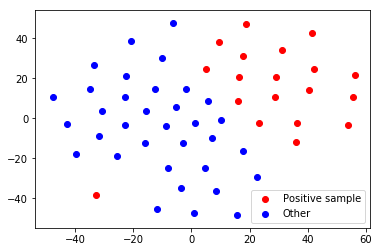

ying liu2
Positive sample size:  22
Total negative sample size: 31
Negative sample size:  31
Positive sample size:  22
Negative sample size:  31
(22, 102)
(31, 102)
Total sample size and shape:  (53, 100)


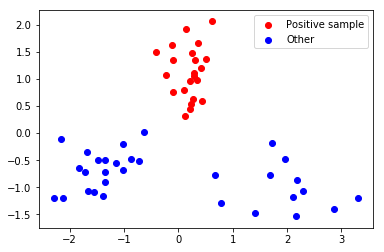

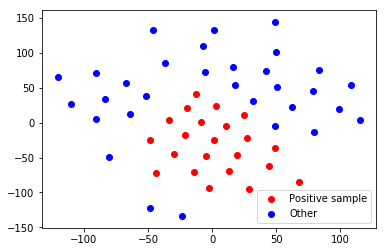

ying zhang0
Positive sample size:  13
Total negative sample size: 14
Negative sample size:  14
Positive sample size:  13
Negative sample size:  14
(13, 102)
(14, 102)
Total sample size and shape:  (27, 100)


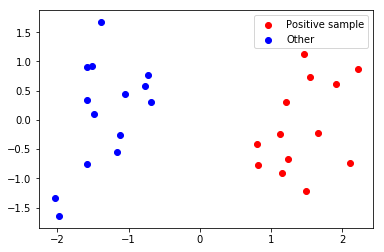

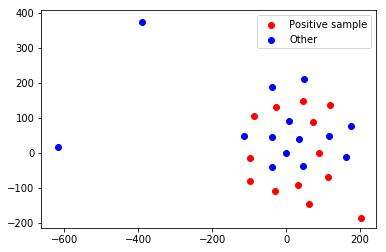

ying zhang1
Positive sample size:  14
Total negative sample size: 13
Negative sample size:  13
Positive sample size:  14
Negative sample size:  13
(14, 102)
(13, 102)
Total sample size and shape:  (27, 100)


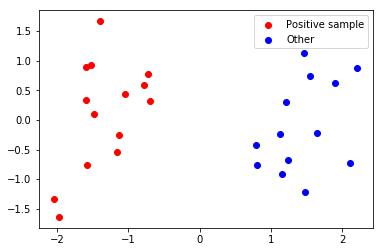

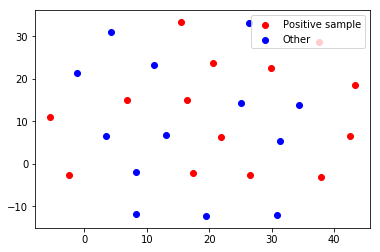

yong liu0
Positive sample size:  11
Total negative sample size: 17
Negative sample size:  17
Positive sample size:  11
Negative sample size:  17
(11, 102)
(17, 102)
Total sample size and shape:  (28, 100)


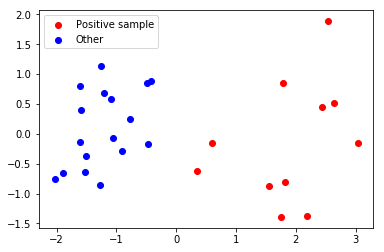

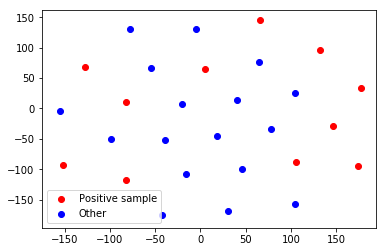

yong liu1
Positive sample size:  17
Total negative sample size: 11
Negative sample size:  11
Positive sample size:  17
Negative sample size:  11
(17, 102)
(11, 102)
Total sample size and shape:  (28, 100)


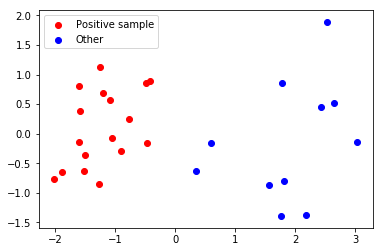

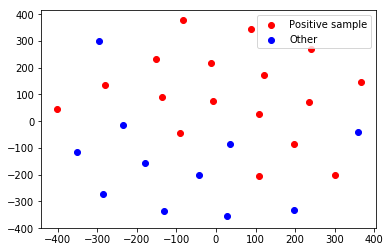

yong wang0
Positive sample size:  29
Total negative sample size: 31
Negative sample size:  31
Positive sample size:  29
Negative sample size:  31
(29, 102)
(31, 102)
Total sample size and shape:  (60, 100)


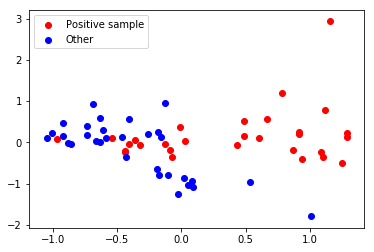

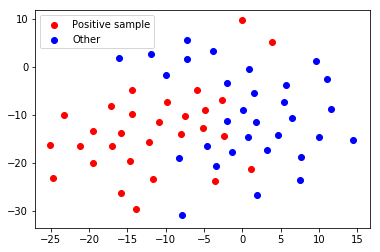

yong wang1
Positive sample size:  31
Total negative sample size: 29
Negative sample size:  29
Positive sample size:  31
Negative sample size:  29
(31, 102)
(29, 102)
Total sample size and shape:  (60, 100)


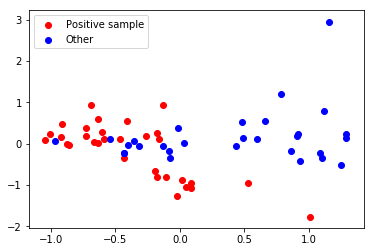

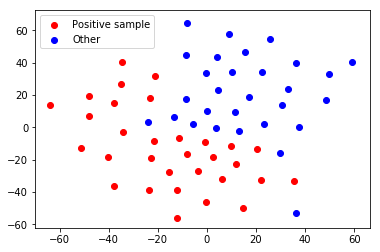

yongsheng liu0
Positive sample size:  18
Total negative sample size: 18
Negative sample size:  18
Positive sample size:  18
Negative sample size:  18
(18, 102)
(18, 102)
Total sample size and shape:  (36, 100)


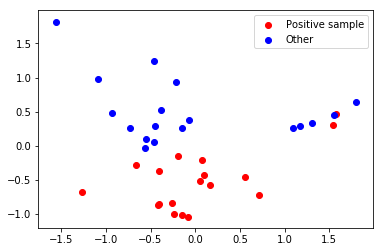

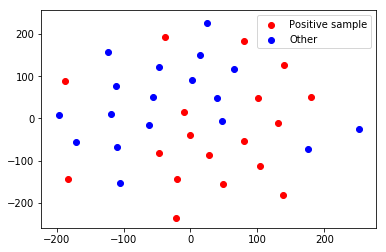

yongsheng liu1
Positive sample size:  18
Total negative sample size: 18
Negative sample size:  18
Positive sample size:  18
Negative sample size:  18
(18, 102)
(18, 102)
Total sample size and shape:  (36, 100)


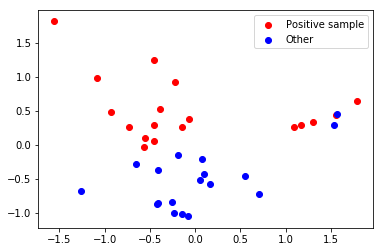

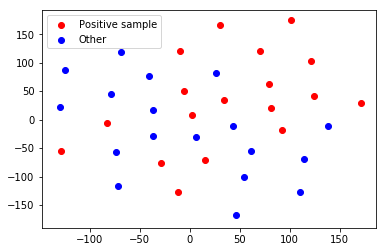

yu zhang0
Positive sample size:  12
Total negative sample size: 13
Negative sample size:  13
Positive sample size:  12
Negative sample size:  13
(12, 102)
(13, 102)
Total sample size and shape:  (25, 100)


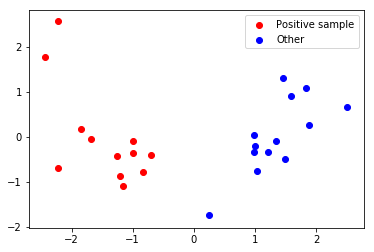

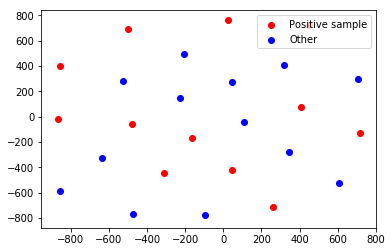

yu zhang1
Positive sample size:  13
Total negative sample size: 12
Negative sample size:  12
Positive sample size:  13
Negative sample size:  12
(13, 102)
(12, 102)
Total sample size and shape:  (25, 100)


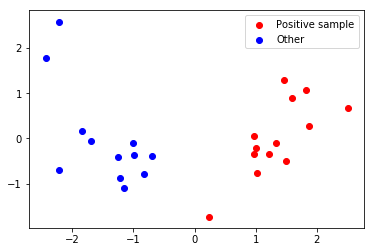

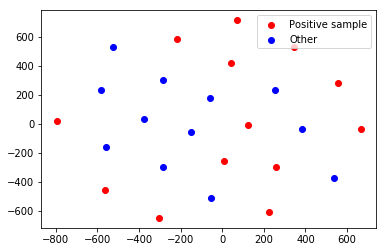

yu-jun zhao0
Positive sample size:  13
Total negative sample size: 15
Negative sample size:  15
Positive sample size:  13
Negative sample size:  15
(13, 102)
(15, 102)
Total sample size and shape:  (28, 100)


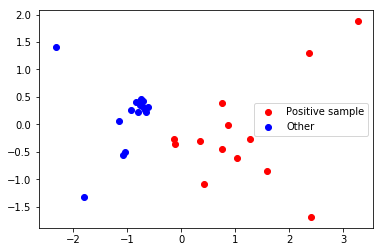

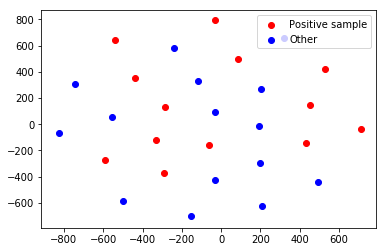

yu-jun zhao1
Positive sample size:  15
Total negative sample size: 13
Negative sample size:  13
Positive sample size:  15
Negative sample size:  13
(15, 102)
(13, 102)
Total sample size and shape:  (28, 100)


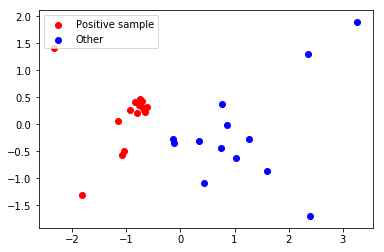

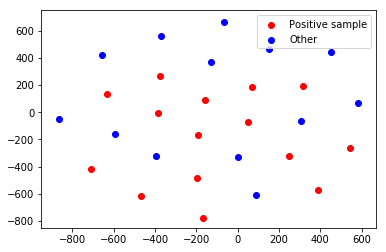

Done


In [32]:
from sklearn import svm
# loop through files in directory |
# add name to name list
# author as positive sample, other as all samples
name_list = []
# create name list for all authors have same name
for file in fileList:
    if not file.startswith('.'):
        if not re.match(r'\D*\d+.txt$', file):
            # fix the coding issue
            name_list.append(file.encode("utf-8", "surrogateescape").decode('utf8','surrogateescape')[:-4])
# print(name_list)

# loop through all the author and gather plots
for name in name_list:
    other_pids = []
    # read other sample
    with open((fileDir+name+".txt").encode('utf-8'), 'r', encoding = 'utf8') as f:
        for line in f:
            other_pids.extend(line.strip().split(" "))
#     print(name)
    for file in fileList:
        file=file.encode("utf-8", "surrogateescape").decode('utf8','surrogateescape')
        if not file.startswith('.'):
            if re.match(r'\D*\d+.txt$', file):
                if name in file:
                    print(os.path.splitext(file)[0])
                    # add author to list for final output
                    author_pids = []
                    # read author sample
                    with open((fileDir+os.path.splitext(file)[0]+".txt").encode('utf-8'), 'r', encoding = 'utf8') as f:
                        for line in f:
                            author_pids.extend(line.strip().split(" "))
                    # print properties
                    print("Positive sample size: ", len(author_pids))
                    # remove author(positive sample) from other(all sample) to create negative sample
                    NegativeSample_pid = extractNegativeSample(author_pids, other_pids)
                    print("Negative sample size: ", len(NegativeSample_pid))
                    # collect all vector
                    classOne, classTwo = extractVectors(author_pids,NegativeSample_pid,allPaperVectors)
                    print(classOne.shape)
                    print(classTwo.shape)
                    # combine data from different class get all data
                    data, label, paperID = combineClassesData(classOne, classTwo)
                    # PCA visualize data
                    plotSavingPath = "../plot/"+setting+"/"
                    visualizeWithPCA(plotSavingPath,os.path.splitext(file)[0],data,label)
                    # TSNE visualize data
                    visualizeWithTSNE(plotSavingPath,os.path.splitext(file)[0],data,label)
print("Done")

In [22]:
# hard code to read the file one by one
# store the features for classification
author_pids = []
other_pids = []
name = "chung-may yang0"
# author as positive sample, other as all samples
with open(fileDir+name+".txt", 'r', encoding = 'utf8') as f:
    for line in f:
        author_pids.extend(line.strip().split(" "))

with open(fileDir+"chung-may yang.txt", 'r', encoding = 'utf8') as f:
    for line in f:
        other_pids.extend(line.strip().split(" "))
        
# size of each class
print(len(author_pids))
print(len(other_pids))

42
113


In [23]:
# extract negative Sample
NegativeSample_pid = extractNegativeSample(author_pids, other_pids)
print("Choicen negative sample ", len(NegativeSample_pid))

Total negative sample size: 71
Choicen negative sample  71


In [24]:
classOne, classTwo = extractVectors(author_pids,NegativeSample_pid,allPaperVectors)
print(classOne.shape)
print(classTwo.shape)

Positive sample size:  42
Negative sample size:  71
(42, 102)
(71, 102)


In [25]:
data, label, paperID = combineClassesData(classOne, classTwo)

Total sample size and shape:  (113, 100)


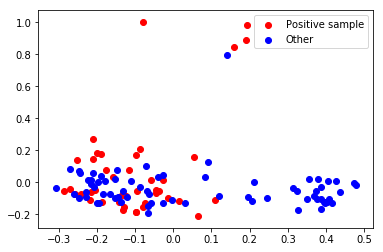

In [26]:
# Principal Component Analysis (PCA)
plotSavingPath = "../plot/"+setting+"/"
visualizeWithPCA(plotSavingPath,name,data,label)

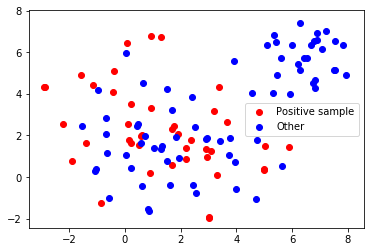

In [27]:
# TSNE
visualizeWithTSNE(plotSavingPath,name,data,label)